Загрузка данных

In [4]:
import pandas as pd

# Загружаем файл Excel
file_path = 'лист 2 общее.xlsx'
try:
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    print("Данные успешно загружены.")
except FileNotFoundError:
    print(f"Файл {file_path} не найден.")
    exit()

Данные успешно загружены.


Предобработка данных

In [6]:
import pandas as pd
from openpyxl import load_workbook

# Загружаем данные
df = pd.read_excel('лист 2 общее.xlsx')

# Очистка данных
df.dropna(how="all", inplace=True)  # Удаляем полностью пустые строки
df.drop(columns=[col for col in df.columns if 'Дата' in col], inplace=True, errors='ignore')  # Удаляем столбцы с "Дата" в названии

# Преобразуем только числовые столбцы (не затрагиваем текстовые)
for col in df.columns:
    # Проверяем, что столбец состоит только из числовых значений
    if df[col].apply(lambda x: isinstance(x, (int, float))).all():
        # Преобразуем числовые значения, но оставляем значения, которые явно не являются датами
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Преобразуем числовые значения

# Сохраняем очищенные данные с новым именем в файл "Очищенные_данные.xlsx"
output_file = 'Очищенные_данные.xlsx'
df.to_excel(output_file, index=False)

# Настроим ширину столбцов в Excel
workbook = load_workbook(output_file)
sheet = workbook.active
for column in sheet.columns:
    max_length = 0
    column_letter = column[0].column_letter  # Определяем букву столбца
    for cell in column:
        try:
            max_length = max(max_length, len(str(cell.value)))
        except:
            pass
    adjusted_width = (max_length + 2) * 1.2  # Добавляем немного пространства
    sheet.column_dimensions[column_letter].width = adjusted_width
workbook.save(output_file)

print("Очищенные данные успешно сохранены в файл: Очищенные_данные.xlsx")



Очищенные данные успешно сохранены в файл: Очищенные_данные.xlsx


Добавление категорий для показателей

In [9]:
import pandas as pd

# Загрузка данных
input_file = 'Очищенные_данные.xlsx'
df = pd.read_excel(input_file)
df.columns = df.columns.str.strip()  # Убирает пробелы с начала и конца названий столбцов

# Функции классификации для разных показателей

def classify_blood_pressure(value):
    if value < 90:
        return "Низкое"
    elif 90 <= value <= 120:
        return "Нормальное"
    else:
        return "Высокое"

def classify_breathlessness(value):
    if value == 0:
        return "Отсутствует"
    elif value == 1:
        return "Легкая"
    elif value == 2:
        return "Умеренная"
    else:
        return "Тяжелая"

def classify_oxygen_saturation(value):
    if value < 90:
        return "Низкий"
    elif 90 <= value <= 95:
        return "Нормальный"
    else:
        return "Высокий"

def classify_heart_rate(value):
    if value < 60:
        return "Низкий"
    elif 60 <= value <= 100:
        return "Нормальный"
    else:
        return "Высокий"

def classify_respiratory_rate(value):
    if value < 12:
        return "Низкий"
    elif 12 <= value <= 20:
        return "Нормальный"
    else:
        return "Высокий"

def classify_systolic_blood_pressure(value):
    return classify_blood_pressure(value)

def classify_diastolic_blood_pressure(value):
    return classify_blood_pressure(value)

def classify_temperature(value):
    if value < 36.0:
        return "Гипотермия"
    elif 36.0 <= value <= 37.5:
        return "Нормальная температура"
    else:
        return "Лихорадка"

def classify_erythrocytes(value):
    if value < 3.8:
        return "Низкий уровень эритроцитов"
    elif 3.8 <= value <= 5.0:
        return "Нормальный уровень эритроцитов"
    else:
        return "Высокий уровень эритроцитов"

def classify_leukocytes(value):
    if value < 4.0:
        return "Низкий уровень лейкоцитов"
    elif 4.0 <= value <= 10.0:
        return "Нормальный уровень лейкоцитов"
    else:
        return "Высокий уровень лейкоцитов"

def classify_platelets(value):
    if value < 150:
        return "Низкий уровень тромбоцитов"
    elif 150 <= value <= 400:
        return "Нормальный уровень тромбоцитов"
    else:
        return "Высокий уровень тромбоцитов"

def classify_esr(value):
    if value < 10:
        return "Низкая СОЭ"
    elif 10 <= value <= 20:
        return "Нормальная СОЭ"
    else:
        return "Высокая СОЭ"

def classify_s_y(value):
    if value < 20:
        return "Низкий уровень С/Я%"
    elif 20 <= value <= 60:
        return "Нормальный уровень С/Я%"
    else:
        return "Высокий уровень С/Я%"

def classify_p_y(value):
    if value < 1:
        return "Низкий уровень п/я %"
    elif 1 <= value <= 6:
        return "Нормальный уровень п/я %"
    else:
        return "Высокий уровень п/я %"

def classify_lymphocytes(value):
    if value < 20:
        return "Низкий уровень лимфоцитов"
    elif 20 <= value <= 40:
        return "Нормальный уровень лимфоцитов"
    else:
        return "Высокий уровень лимфоцитов"

def classify_monocytes(value):
    if value < 2:
        return "Низкий уровень моноцитов"
    elif 2 <= value <= 8:
        return "Нормальный уровень моноцитов"
    else:
        return "Высокий уровень моноцитов"

def classify_eosinophils(value):
    if value < 1:
        return "Низкий уровень эозинофилов"
    elif 1 <= value <= 4:
        return "Нормальный уровень эозинофилов"
    else:
        return "Высокий уровень эозинофилов"

def classify_basophils(value):
    if value < 0.5:
        return "Низкий уровень базофилов"
    elif 0.5 <= value <= 1:
        return "Нормальный уровень базофилов"
    else:
        return "Высокий уровень базофилов"

def classify_urine_erythrocytes(value):
    if value == 0:
        return "Нет эритроцитов в моче"
    elif 1 <= value <= 3:
        return "Мало эритроцитов в моче"
    else:
        return "Много эритроцитов в моче"

def classify_urine_leukocytes(value):
    if value == 0:
        return "Нет лейкоцитов в моче"
    elif 1 <= value <= 5:
        return "Мало лейкоцитов в моче"
    else:
        return "Много лейкоцитов в моче"

def classify_acetone(value):
    if value < 0.3:
        return "Низкий уровень ацетона"
    elif 0.3 <= value <= 0.5:
        return "Нормальный уровень ацетона"
    else:
        return "Высокий уровень ацетона"

def classify_ph(value):
    if value < 7.35:
        return "Низкий уровень pH"
    elif 7.35 <= value <= 7.45:
        return "Нормальный уровень pH"
    else:
        return "Высокий уровень pH"

def classify_ast(value):
    if value < 15:
        return "Низкий уровень АСТ"
    elif 15 <= value <= 40:
        return "Нормальный уровень АСТ"
    else:
        return "Высокий уровень АСТ"

def classify_alt(value):
    if value < 10:
        return "Низкий уровень АЛТ"
    elif 10 <= value <= 40:
        return "Нормальный уровень АЛТ"
    else:
        return "Высокий уровень АЛТ"

def classify_glucose(value):
    if value < 3.5:
        return "Низкий уровень глюкозы"
    elif 3.5 <= value <= 5.5:
        return "Нормальный уровень глюкозы"
    else:
        return "Высокий уровень глюкозы"

def classify_urea(value):
    if value < 2.5:
        return "Низкий уровень мочевины"
    elif 2.5 <= value <= 8.0:
        return "Нормальный уровень мочевины"
    else:
        return "Высокий уровень мочевины"

def classify_bilirubin_direct(value):
    if value < 2:
        return "Низкий уровень прямого билирубина"
    elif 2 <= value <= 5:
        return "Нормальный уровень прямого билирубина"
    else:
        return "Высокий уровень прямого билирубина"

def classify_bilirubin_total(value):
    if value < 5:
        return "Низкий уровень общего билирубина"
    elif 5 <= value <= 17:
        return "Нормальный уровень общего билирубина"
    else:
        return "Высокий уровень общего билирубина"

def classify_crp(value):
    if value < 5:
        return "Низкий уровень СРБ"
    elif 5 <= value <= 10:
        return "Нормальный уровень СРБ"
    else:
        return "Высокий уровень СРБ"

def classify_ferritin(value):
    if value < 30:
        return "Низкий уровень ферритина"
    elif 30 <= value <= 150:
        return "Нормальный уровень ферритина"
    else:
        return "Высокий уровень ферритина"

def classify_aPTT(value):
    if value < 30:
        return "Низкий уровень АЧТВ"
    elif 30 <= value <= 45:
        return "Нормальный уровень АЧТВ"
    else:
        return "Высокий уровень АЧТВ"

def classify_d_dimer(value):
    if value < 0.5:
        return "Низкий уровень D-димера"
    elif 0.5 <= value <= 1.0:
        return "Нормальный уровень D-димера"
    else:
        return "Высокий уровень D-димера"

def classify_pti(value):
    if value < 70:
        return "Низкий ПТИ"
    elif 70 <= value <= 100:
        return "Нормальный ПТИ"
    else:
        return "Высокий ПТИ"

def classify_vit_d(value):
    if value < 20:
        return "Недостаток витамина D"
    elif 20 <= value <= 50:
        return "Нормальный уровень витамина D"
    else:
        return "Избыток витамина D"

def classify_fibrinogen(value):
    if value < 1.5:
        return "Низкий уровень фибриногена"
    elif 1.5 <= value <= 4.0:
        return "Нормальный уровень фибриногена"
    else:
        return "Высокий уровень фибриногена"
    
def classify_ptv(value):
    if value < 10:
        return "Низкий уровень ПТВ"
    elif 10 <= value <= 15:
        return "Нормальный уровень ПТВ"
    else:
        return "Высокий уровень ПТВ"

def classify_binary(value):
    if value == 0:
        return "Отсутствует"
    elif value == 1:
        return "Присутствует"
    else:
        return "Неопределено"

def classify_lung_damage(value):
    if value < 25:
        return "Низкий уровень поражения"
    elif 25 <= value <= 50:
        return "Умеренный уровень поражения"
    elif 50 < value <= 75:
        return "Высокий уровень поражения"
    else:
        return "Критическое поражение"

def classify_albumin(value):
    if value < 35:
        return "Низкий уровень альбумина"
    elif 35 <= value <= 50:
        return "Нормальный уровень альбумина"
    else:
        return "Высокий уровень альбумина"

# Креатинин мкм/л
def classify_creatinine(value):
    if value < 62:
        return "Низкий уровень креатинина"
    elif 62 <= value <= 115:
        return "Нормальный уровень креатинина"
    else:
        return "Высокий уровень креатинина"

# Белок
def classify_protein(value):
    if value < 60:
        return "Низкий уровень белка"
    elif 60 <= value <= 80:
        return "Нормальный уровень белка"
    else:
        return "Высокий уровень белка"

# Сахар (ммоль/л)
def classify_glucose(value):
    if value < 3.5:
        return "Низкий уровень сахара"
    elif 3.5 <= value <= 5.5:
        return "Нормальный уровень сахара"
    else:
        return "Высокий уровень сахара"


# Гемоглобин
def classify_hemoglobin(value):
    if value < 120:
        return "Низкий уровень гемоглобина"
    elif 120 <= value <= 160:
        return "Нормальный уровень гемоглобина"
    else:
        return "Высокий уровень гемоглобина"

# ЧДД (Частота дыхания в минутах)
def classify_respiratory_rate(value):
    if value < 12:
        return "Низкая частота дыхания"
    elif 12 <= value <= 20:
        return "Нормальная частота дыхания"
    else:
        return "Высокая частота дыхания"

# ЧСС (Частота сердечных сокращений в минуту)
def classify_heart_rate(value):
    if value < 60:
        return "Низкая частота сердечных сокращений"
    elif 60 <= value <= 100:
        return "Нормальная частота сердечных сокращений"
    else:
        return "Высокая частота сердечных сокращений"

# Sat O2 % (Сатурация кислорода в крови)
def classify_oxygen_saturation(value):
    if value < 90:
        return "Низкий уровень сатурации кислорода"
    elif 90 <= value <= 95:
        return "Нормальный уровень сатурации кислорода"
    else:
        return "Высокий уровень сатурации кислорода"






# Применение классификации ко всем столбцам и замена значений непосредственно в них
df['САД'] = df['САД'].apply(classify_systolic_blood_pressure)  # Систолическое давление
df['ДАД'] = df['ДАД'].apply(classify_diastolic_blood_pressure)  # Диастолическое давление
df['Температура тела'] = df['Температура тела'].apply(classify_temperature)  # Температура
df['Эритроциты'] = df['Эритроциты'].apply(classify_erythrocytes)  # Эритроциты
df['Лейкоциты'] = df['Лейкоциты'].apply(classify_leukocytes)  # Лейкоциты
df['Тромбоциты'] = df['Тромбоциты'].apply(classify_platelets)  # Тромбоциты
df['СОЭ мм/ч'] = df['СОЭ мм/ч'].apply(classify_esr)  # СОЭ
df['С/Я%'] = df['С/Я%'].apply(classify_s_y)  # С/Я%
df['п/я %'] = df['п/я %'].apply(classify_p_y)  # П/Я%
df['Лимфоциты'] = df['Лимфоциты'].apply(classify_lymphocytes)  # Лимфоциты
df['Моноциты %'] = df['Моноциты %'].apply(classify_monocytes)  # Моноциты
df['Эозифилы %'] = df['Эозифилы %'].apply(classify_eosinophils)  # Эозинофилы
df['Базофилы %'] = df['Базофилы %'].apply(classify_basophils)  # Базофилы
df['Моча эритроциты'] = df['Моча эритроциты'].apply(classify_urine_erythrocytes)  # Моча эритроциты
df['Моча лейкоциты'] = df['Моча лейкоциты'].apply(classify_urine_leukocytes)  # Моча лейкоциты
df['Ацетон ммоль/л'] = df['Ацетон ммоль/л'].apply(classify_acetone)  # Ацетон
df['РН'] = df['РН'].apply(classify_ph)  # РН
df['АСТ'] = df['АСТ'].apply(classify_ast)  # АСТ
df['АЛТ'] = df['АЛТ'].apply(classify_alt)  # АЛТ
df['Глюкоза ммоль/л'] = df['Глюкоза ммоль/л'].apply(classify_glucose)  # Глюкоза
df['Мочевина ммоль/л'] = df['Мочевина ммоль/л'].apply(classify_urea)  # Мочевина
df['Бил прямой мкм/л'] = df['Бил прямой мкм/л'].apply(classify_bilirubin_direct)  # Прямой билирубин
df['Бил общий мкм/л'] = df['Бил общий мкм/л'].apply(classify_bilirubin_total)  # Общий билирубин
df['СРБ мг/л'] = df['СРБ мг/л'].apply(classify_crp)  # СРБ
df['Ферритин нг/л'] = df['Ферритин нг/л'].apply(classify_ferritin)  # Ферритин
df['АЧТВ, с'] = df['АЧТВ, с'].apply(classify_aPTT)  # АЧТВ
df['Концентрация D-димера'] = df['Концентрация D-димера'].apply(classify_d_dimer)  # D-димер
df['ПТИ %'] = df['ПТИ %'].apply(classify_pti)  # ПТИ
df['Фибриноген, г/л'] = df['Фибриноген, г/л'].apply(classify_fibrinogen)  # Фибриноген
df['ПТВ, с'] = df['ПТВ, с'].apply(classify_ptv)  # ПТВ
df['Инсуфляция'] = df['Инсуфляция'].apply(classify_binary)  # Инсуфляция
df['ИВЛ'] = df['ИВЛ'].apply(classify_binary)  # ИВЛ
df['Антибиотики'] = df['Антибиотики'].apply(classify_binary)  # Антибиотики
df['Гормоны'] = df['Гормоны'].apply(classify_binary)  # Гормоны
df['Пневмония'] = df['Пневмония'].apply(classify_binary)  # Пневмония
df['Объем поражения легких %'] = df['Объем поражения легких %'].apply(classify_lung_damage)  # Поражение легких
df['Альбумин'] = df['Альбумин'].apply(classify_albumin)  # Альбумин
df['Креатинин мкм/л'] = df['Креатинин мкм/л'].apply(classify_creatinine)  # Креатинин
df['Белок'] = df['Белок'].apply(classify_protein)  # Белок
df['Сахар ммоль/л'] = df['Сахар ммоль/л'].apply(classify_glucose)  # Сахар ммоль/л
df['Гемоглобин'] = df['Гемоглобин'].apply(classify_hemoglobin)  # Гемоглобин
df['ЧДД'] = df['ЧДД'].apply(classify_respiratory_rate)  # ЧДД
df['ЧСС'] = df['ЧСС'].apply(classify_heart_rate)  # ЧСС
df['Sat O2 %'] = df['Sat O2 %'].apply(classify_oxygen_saturation)  # Sat O2 %



# Сохранение результатов в новый файл
df.to_excel('Очищенные_данные_с_классификацией.xlsx', index=False)


Анализ данных

In [2]:
import pandas as pd
import tkinter as tk
from tkinter import ttk

# Загрузка данных
data = pd.read_excel('Очищенные_данные.xlsx')
data = data.dropna(subset=['Шифр'])  # Убираем строки с NaN в 'Шифр'

# Фильтрация по заболеванию
flu_data = data[data['Шифр'].str.startswith('Г')]
covid_data = data[data['Шифр'].str.contains('кф')]


# Функция для форматирования распределения по полу
def format_gender_distribution(data):
    gender_counts = data['Пол'].value_counts()
    male_count = gender_counts.get(1, 0)  # Если нет мужчин, значение будет 0
    female_count = gender_counts.get(0, 0)  # Если нет женщин, значение будет 0
    return f"Мужчины: {male_count}, Женщины: {female_count}"


# Вычисления показателей
results = {
    "Средний возраст - Грипп": flu_data['Возраст'].mean(),
    "Средний возраст - COVID": covid_data['Возраст'].mean(),
    "Распределение по полу для Гриппа": format_gender_distribution(flu_data),
    "Распределение по полу для COVID": format_gender_distribution(covid_data),
    "Средняя продолжительность госпитализации - Грипп": flu_data['Продолжительность госпитализации'].mean(),
    "Средняя продолжительность госпитализации - COVID": covid_data['Продолжительность госпитализации'].mean(),
    "Средняя сатурация - Грипп": flu_data['Sat O2 %'].mean(),
    "Средняя сатурация - COVID": covid_data['Sat O2 %'].mean(),
    "Средний уровень СРБ - Грипп": flu_data['СРБ мг/л'].mean(),
    "Средний уровень СРБ - COVID": covid_data['СРБ мг/л'].mean(),
    "Средний уровень эритроцитов - Грипп": flu_data['Эритроциты'].mean(),
    "Средний уровень эритроцитов - COVID": covid_data['Эритроциты'].mean(),
    "Средний уровень лейкоцитов - Грипп": flu_data['Лейкоциты'].mean(),
    "Средний уровень лейкоцитов - COVID": covid_data['Лейкоциты'].mean(),
    "Средний уровень тромбоцитов - Грипп": flu_data['Тромбоциты'].mean(),
    "Средний уровень тромбоцитов - COVID": covid_data['Тромбоциты'].mean(),
    "Средний уровень СОЭ - Грипп": flu_data['СОЭ мм/ч'].mean(),
    "Средний уровень СОЭ - COVID": covid_data['СОЭ мм/ч'].mean()
}

# Преобразуем данные в DataFrame для отображения
df_results = pd.DataFrame(list(results.items()), columns=["Показатель", "Значение"])


# Функция для формирования текстовых выводов
def generate_comparative_analysis():
    analysis = ""

    if results["Средний возраст - Грипп"] < results["Средний возраст - COVID"]:
        analysis += "1. Грипп чаще встречается у более молодых пациентов, чем COVID.\n"
    else:
        analysis += "1. COVID чаще встречается у более молодых пациентов, чем грипп.\n"

    if results["Средняя продолжительность госпитализации - Грипп"] < results[
        "Средняя продолжительность госпитализации - COVID"]:
        analysis += "2. Пациенты с COVID проводят больше времени в больнице, чем с гриппом.\n"
    else:
        analysis += "2. Пациенты с гриппом проводят больше времени в больнице, чем с COVID.\n"

    if results["Средняя сатурация - Грипп"] > results["Средняя сатурация - COVID"]:
        analysis += "3. У пациентов с гриппом наблюдается немного более высокая сатурация, чем у пациентов с COVID.\n"
    else:
        analysis += "3. У пациентов с COVID наблюдается немного более высокая сатурация, чем у пациентов с гриппом.\n"

    if results["Средний уровень СРБ - Грипп"] < results["Средний уровень СРБ - COVID"]:
        analysis += "4. Уровень СРБ выше у пациентов с COVID, что может свидетельствовать о более выраженной воспалительной реакции.\n"
    else:
        analysis += "4. Уровень СРБ выше у пациентов с гриппом.\n"

    if results["Средний уровень эритроцитов - Грипп"] < results["Средний уровень эритроцитов - COVID"]:
        analysis += "5. У пациентов с COVID наблюдается более высокий уровень эритроцитов.\n"
    else:
        analysis += "5. У пациентов с гриппом наблюдается более высокий уровень эритроцитов.\n"

    if results["Средний уровень лейкоцитов - Грипп"] < results["Средний уровень лейкоцитов - COVID"]:
        analysis += "6. У пациентов с COVID выше уровень лейкоцитов, что может говорить о различиях в иммунной реакции.\n"
    else:
        analysis += "6. У пациентов с гриппом выше уровень лейкоцитов.\n"

    return analysis


# Создаем окно
root = tk.Tk()
root.title("Результаты анализа")

# Настроим таблицу для выводов
tree = ttk.Treeview(root, columns=("Показатель", "Значение"), show="headings", height=10)
tree.heading("Показатель", text="Показатель")
tree.heading("Значение", text="Значение")

# Вставляем данные в таблицу
for index, row in df_results.iterrows():
    tree.insert("", "end", values=(row["Показатель"], row["Значение"]))

# Размещаем таблицу в окне
tree.pack(padx=10, pady=10)

# Текстовое поле для выводов
label = tk.Label(root, text="Сравнительный анализ: \n" + generate_comparative_analysis(), justify="left", anchor="w")
label.pack(padx=10, pady=10)

# Запуск приложения
root.mainloop()


Построение графиков

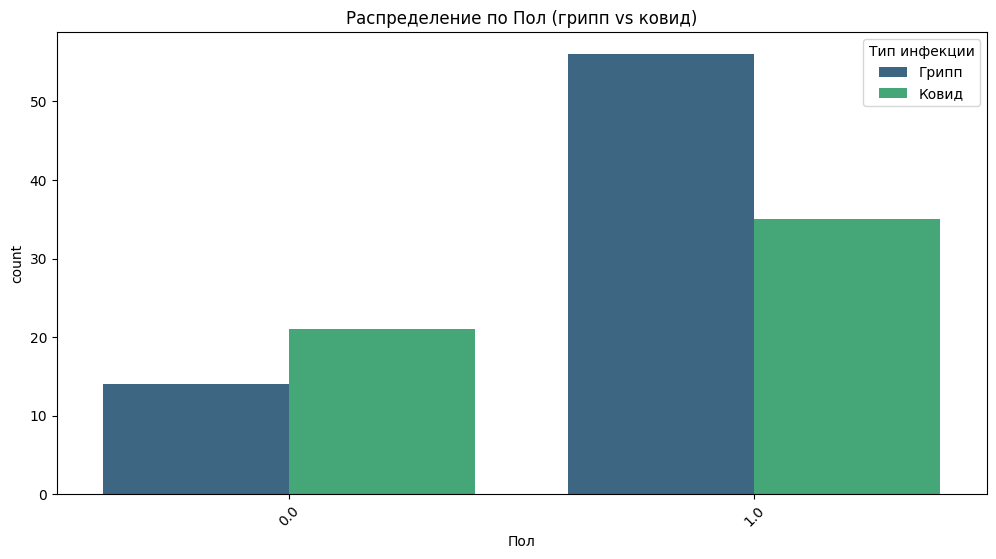

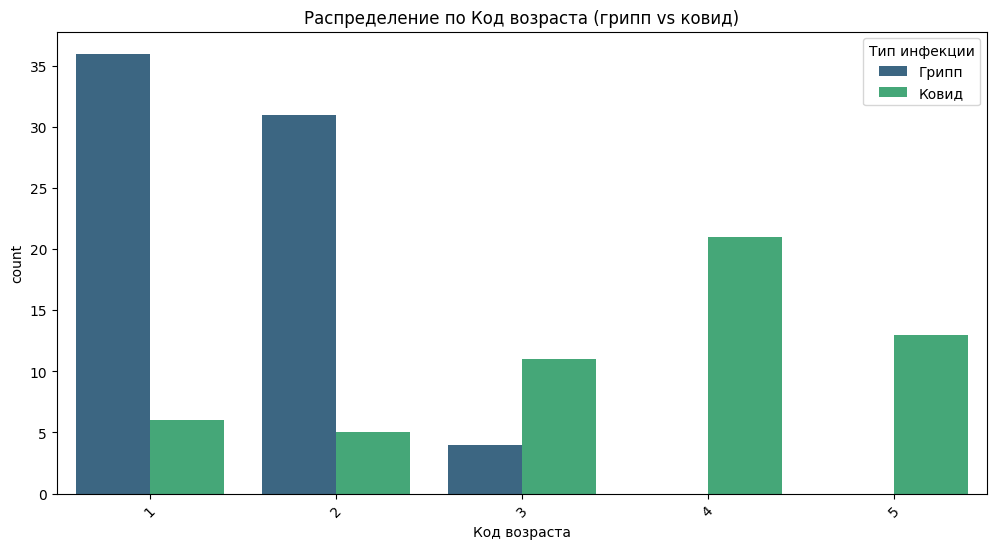

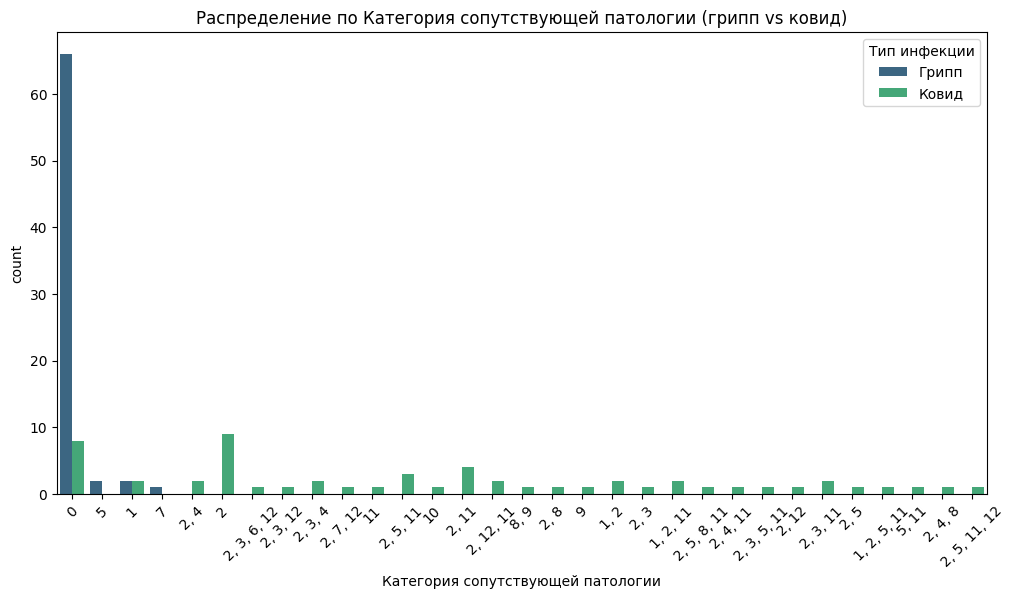

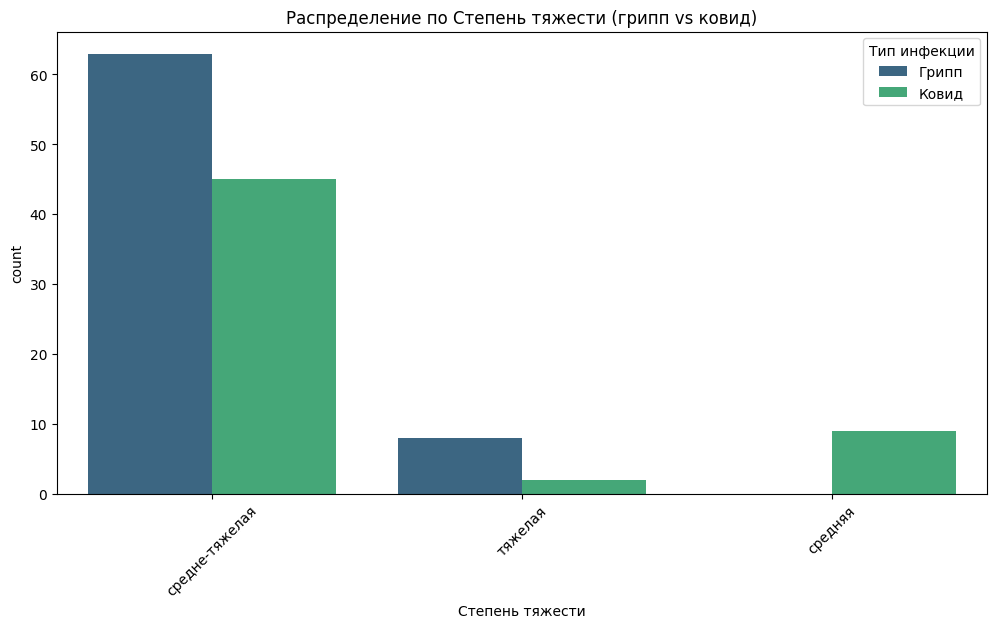

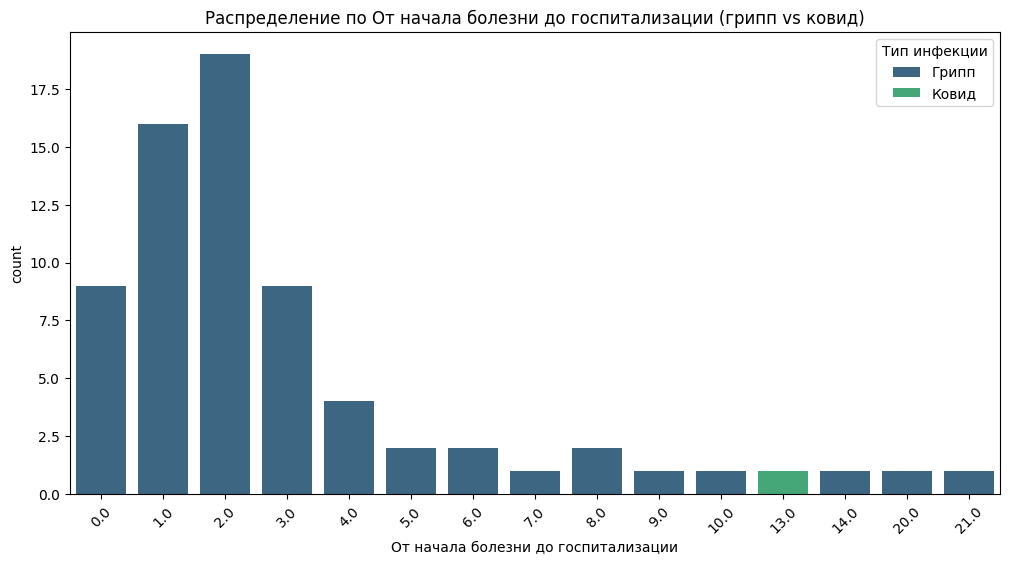

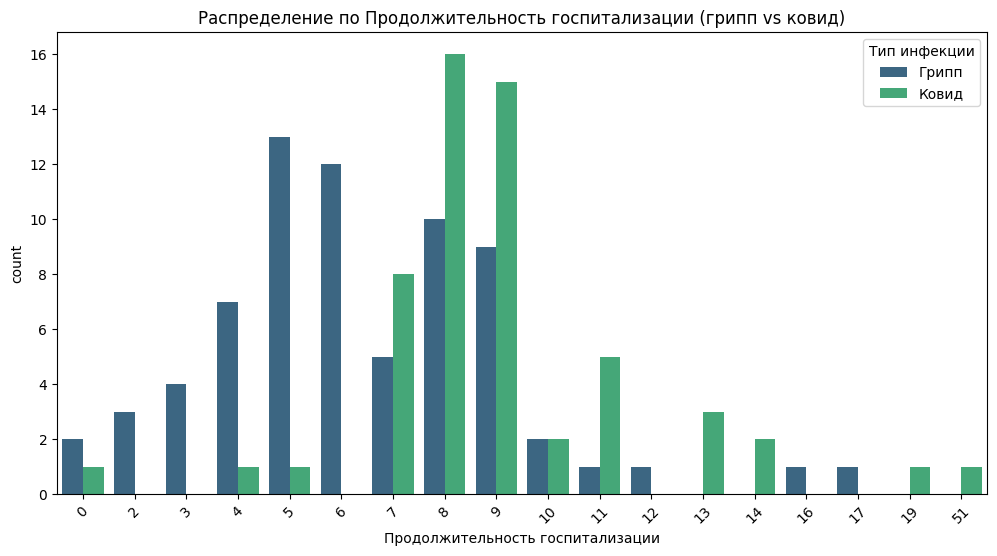

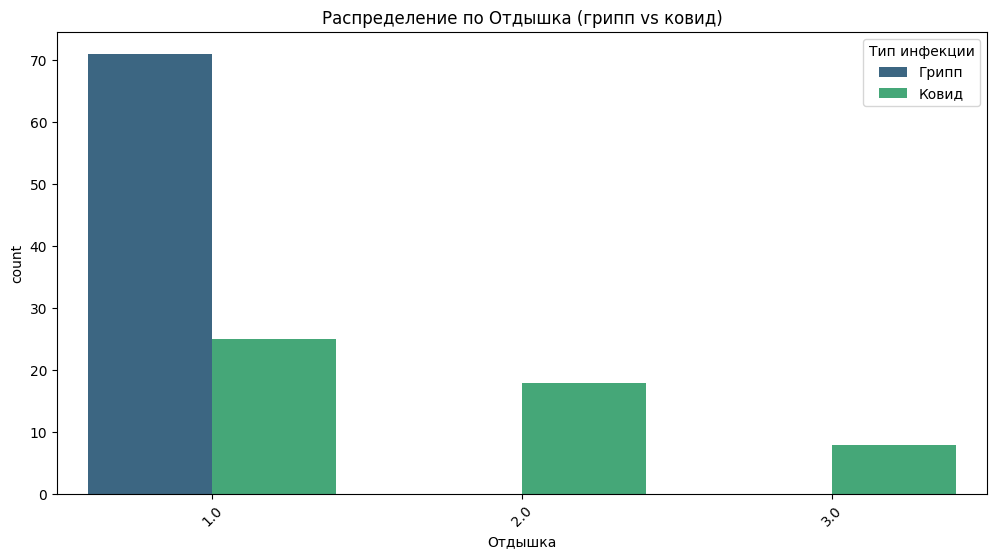

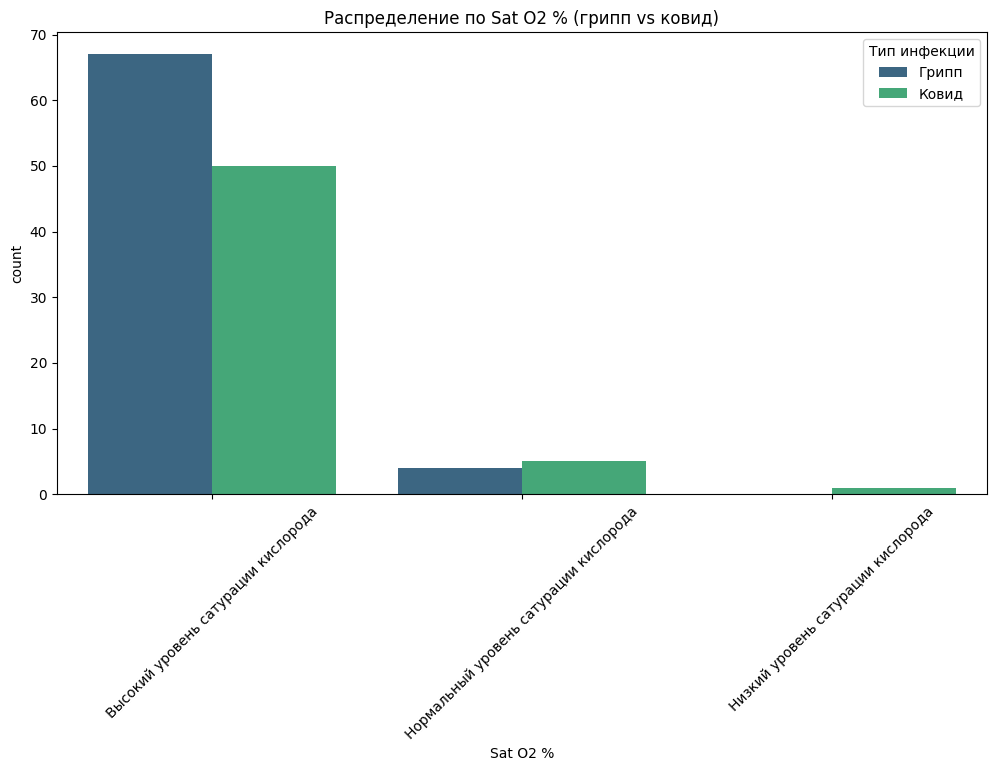

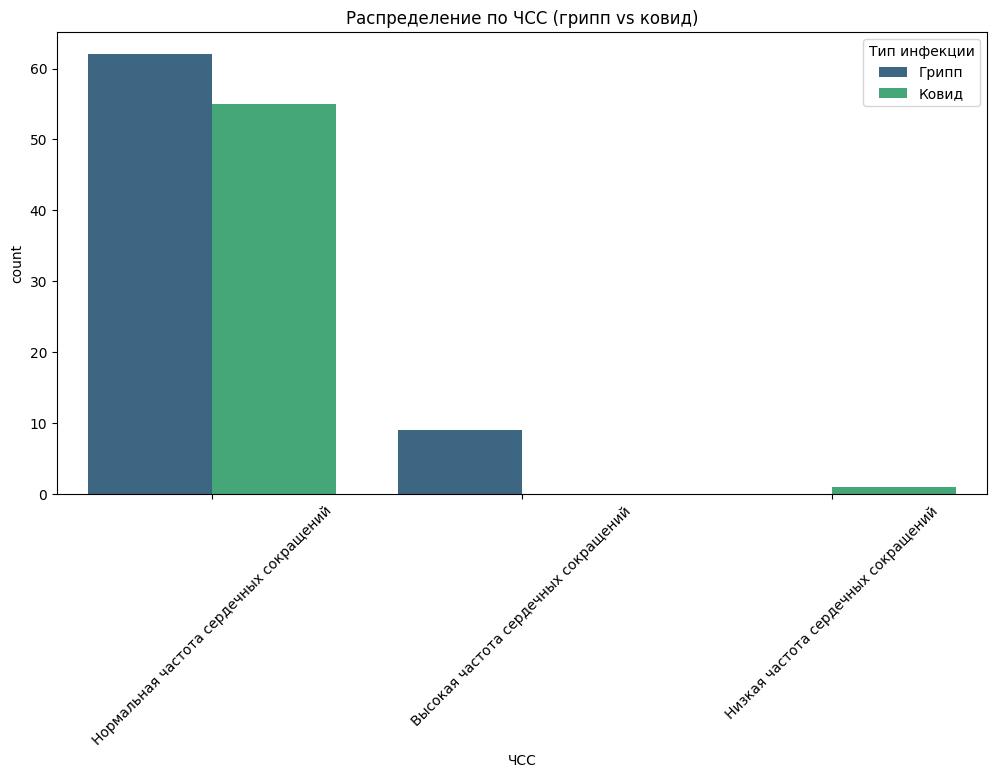

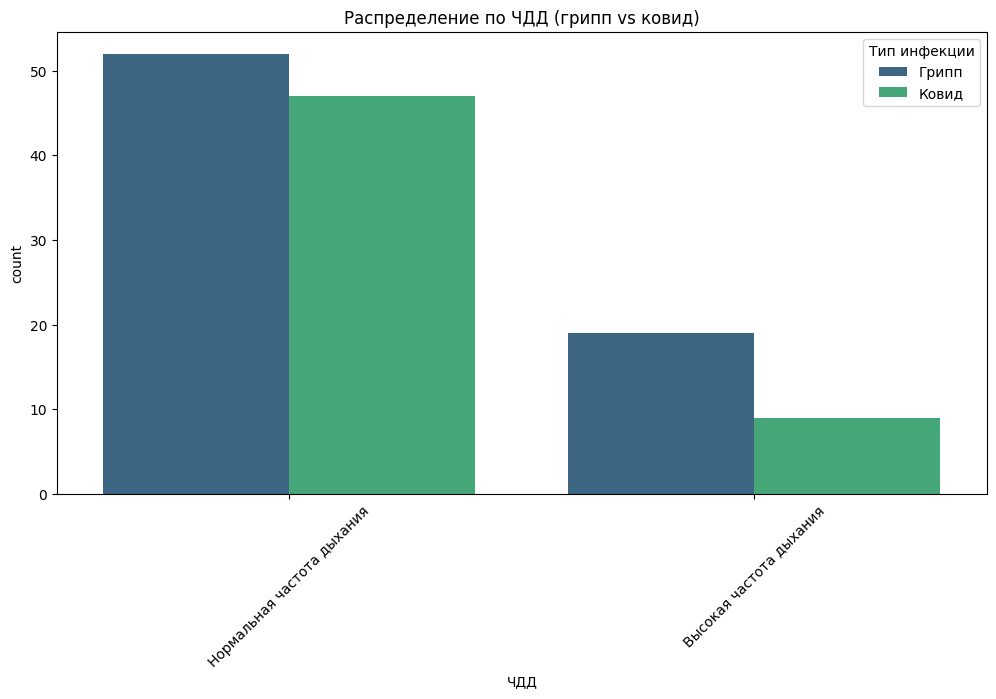

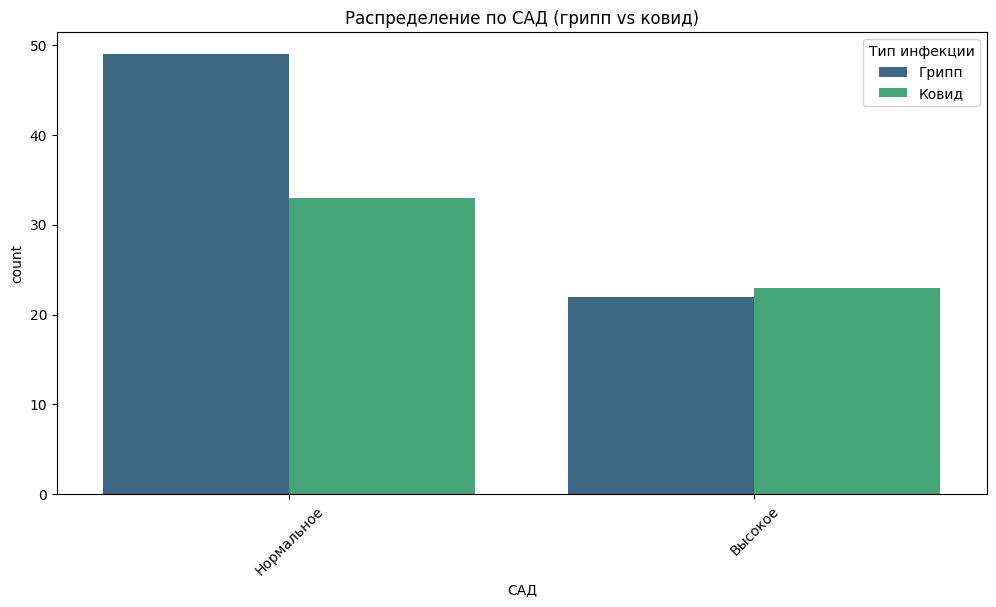

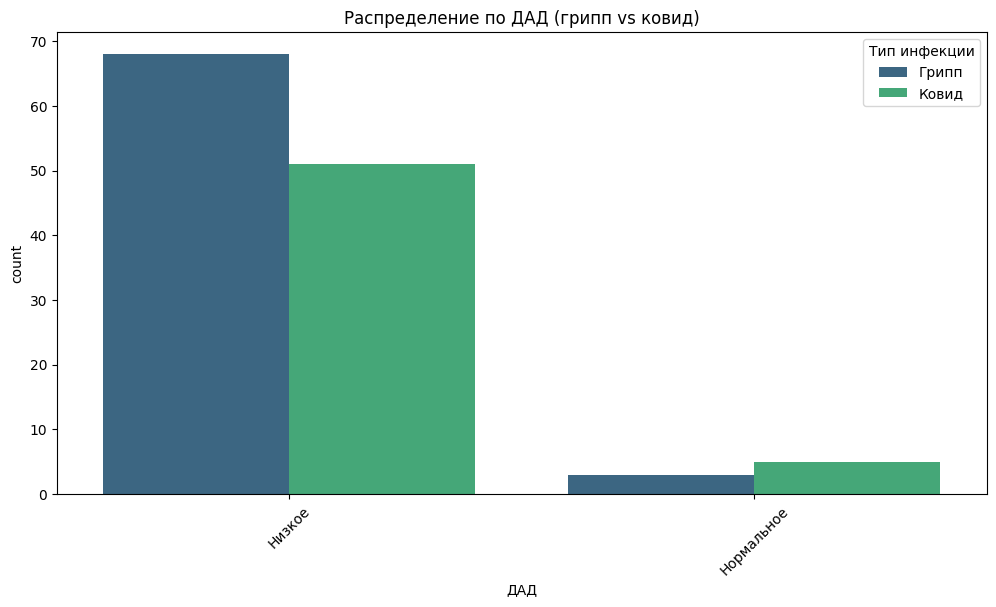

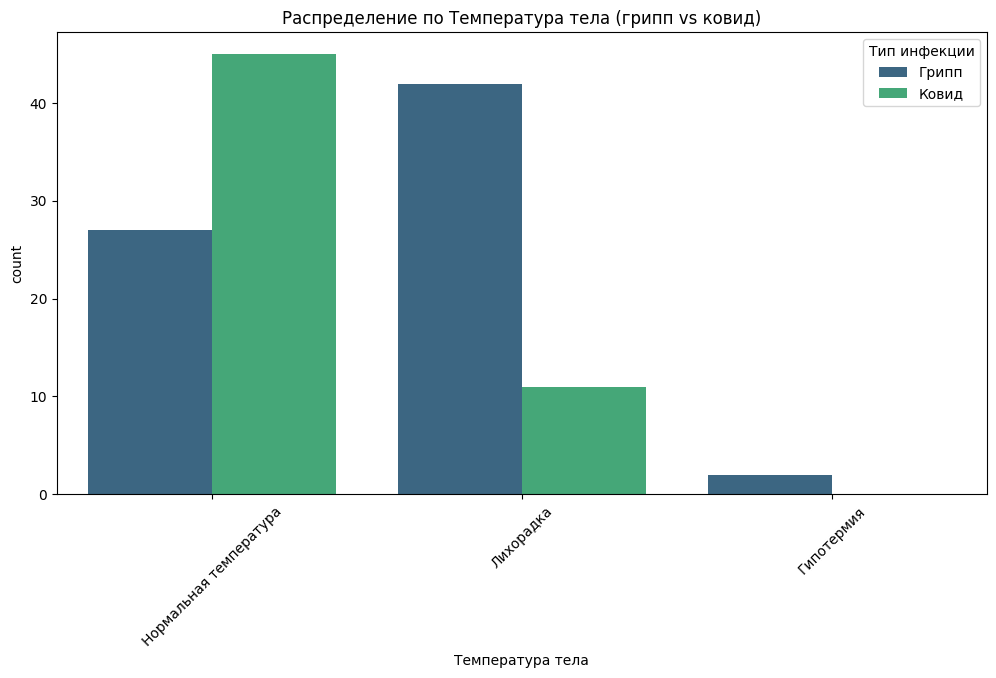

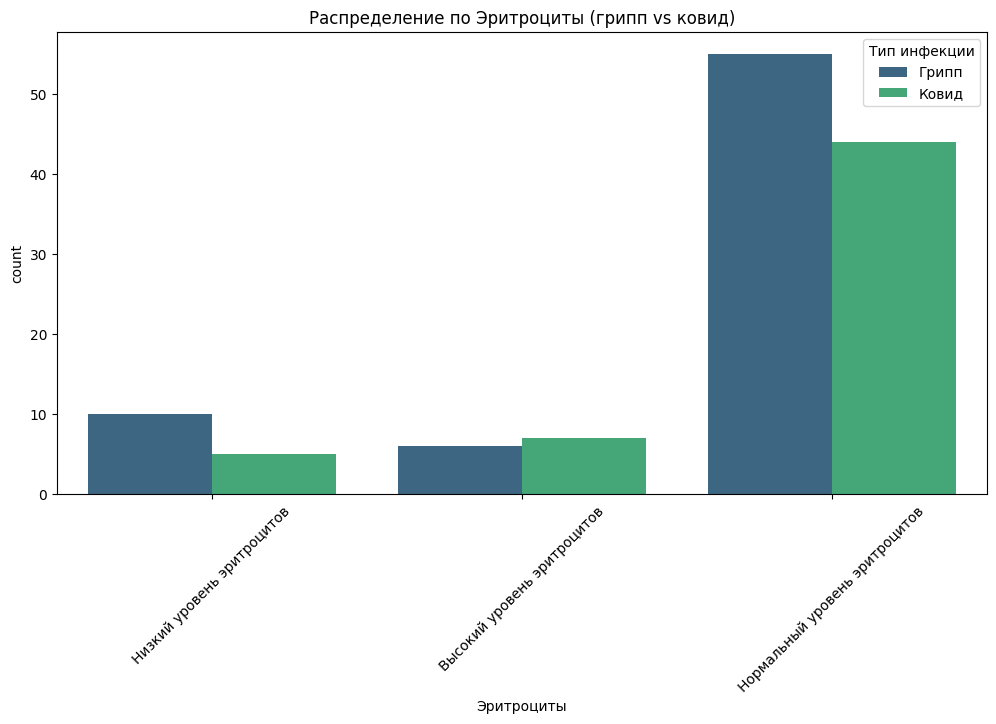

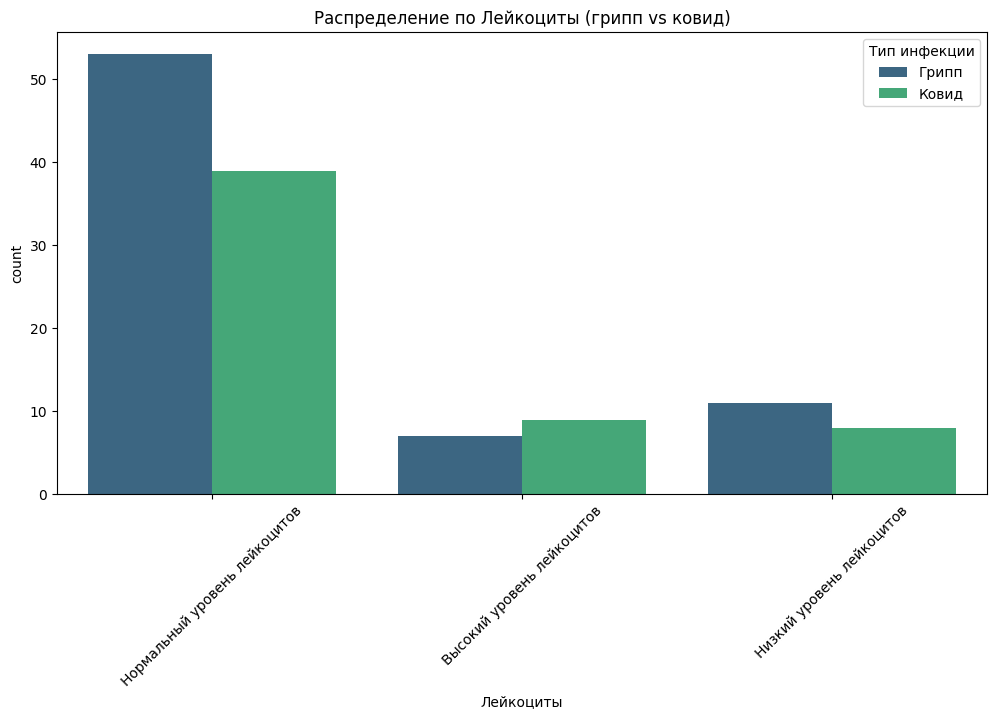

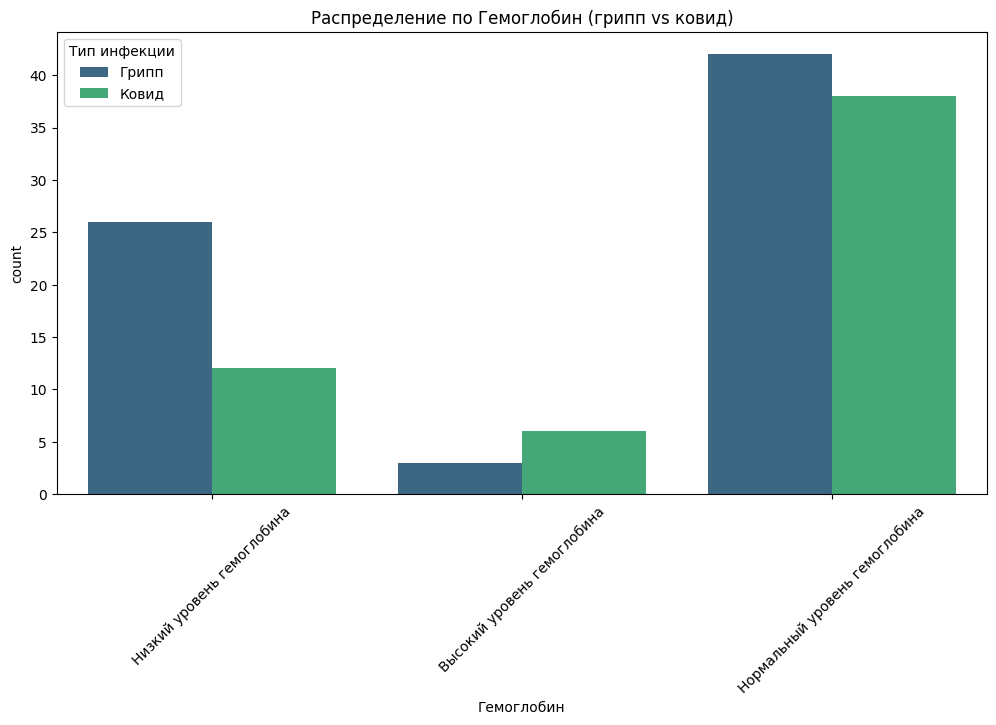

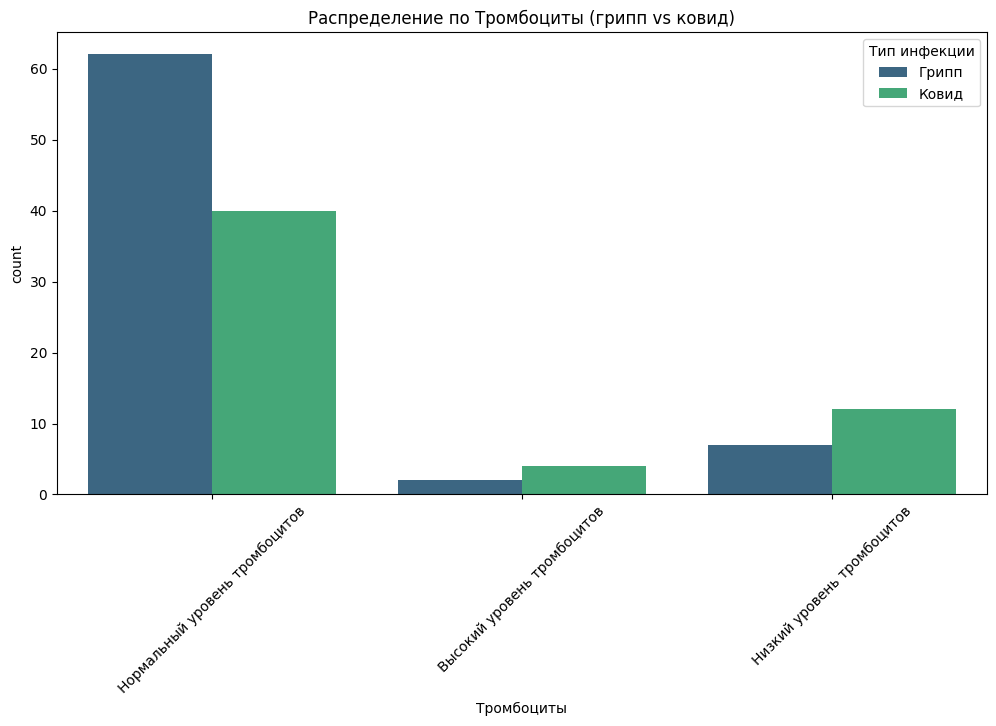

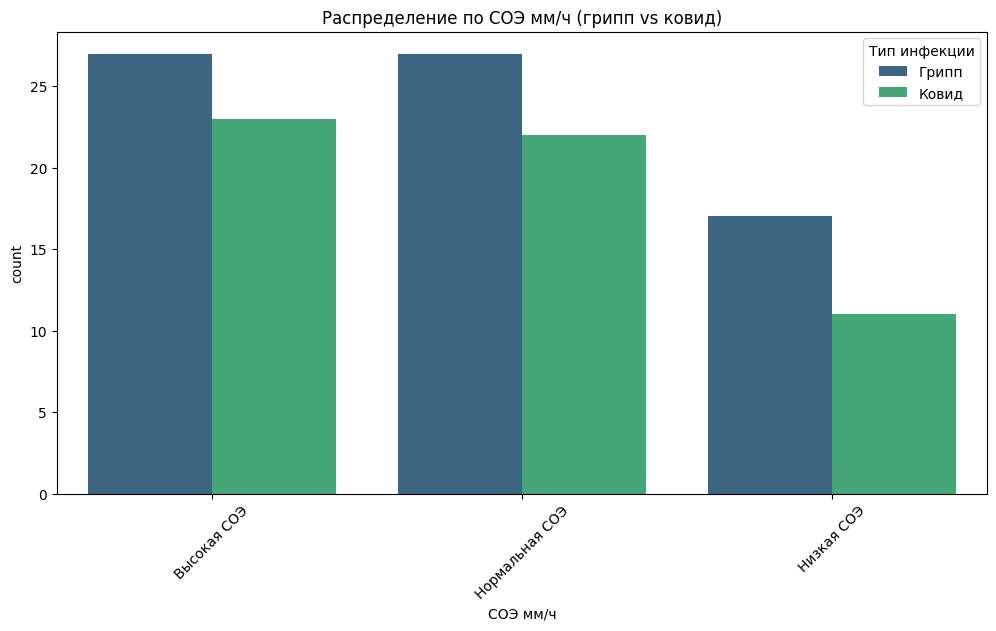

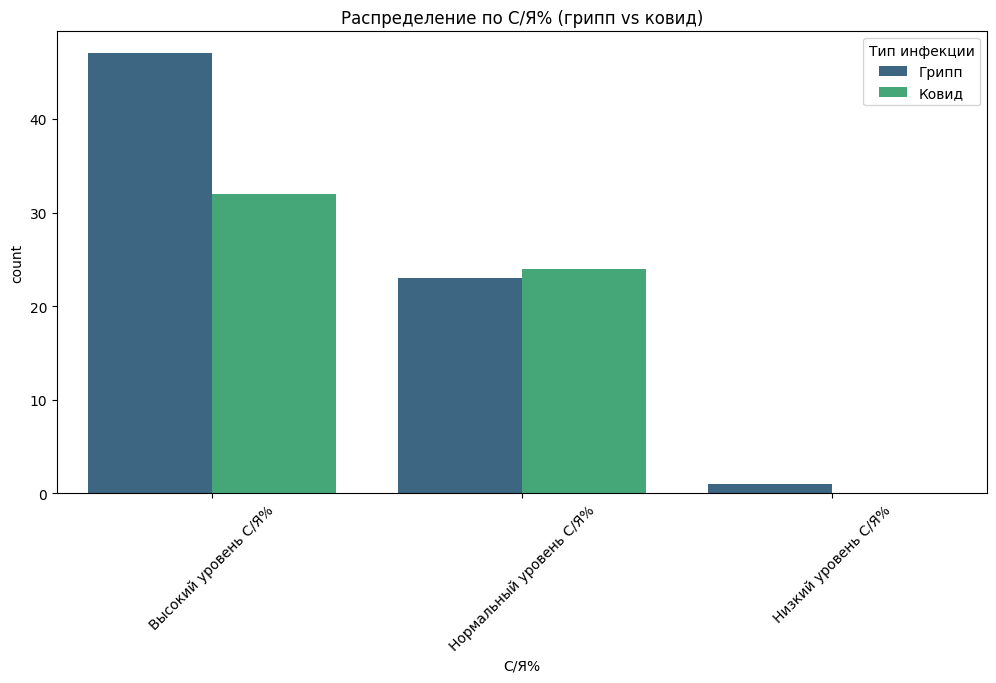

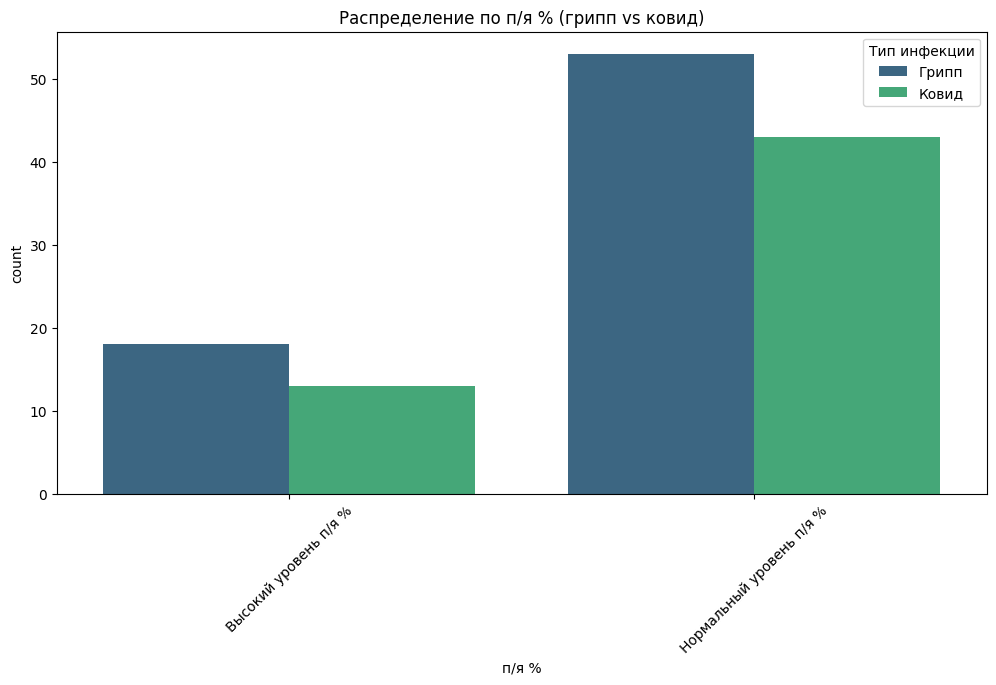

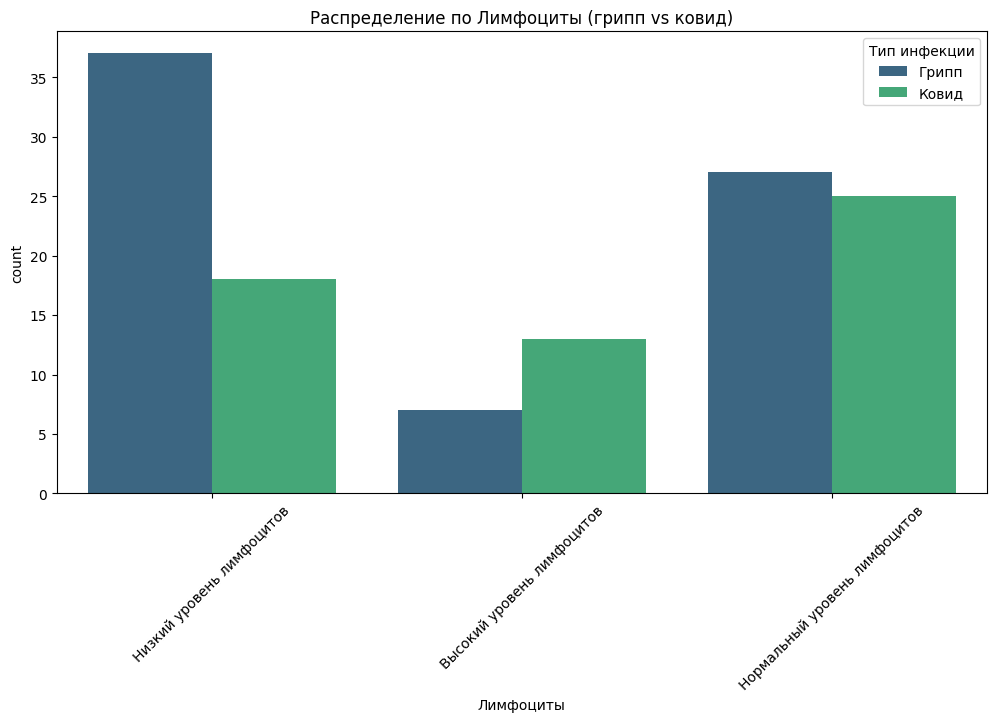

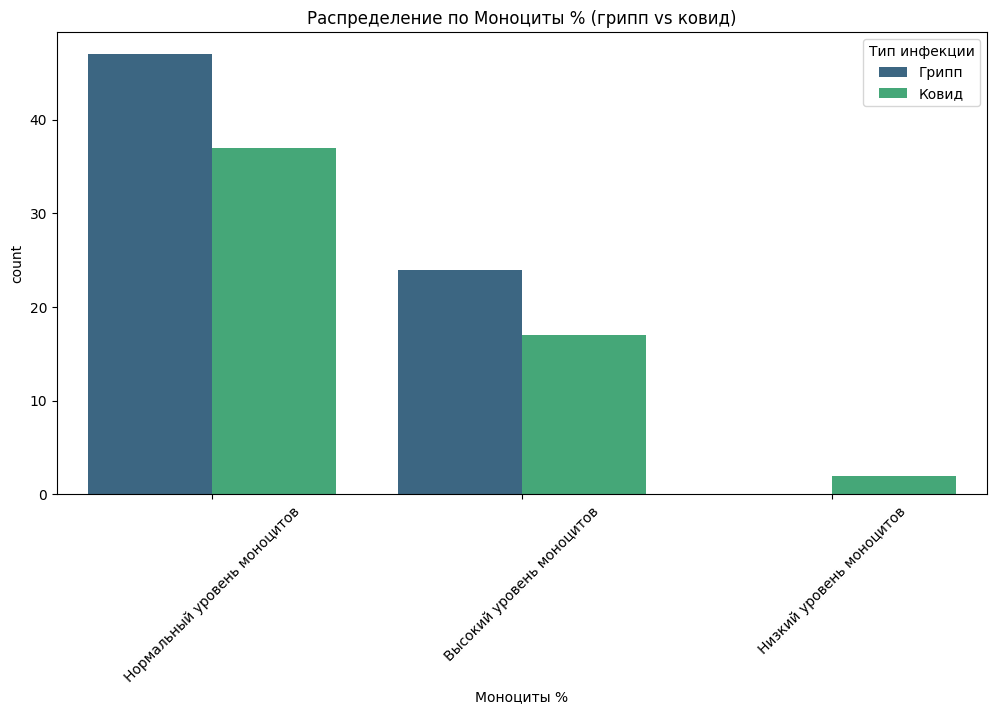

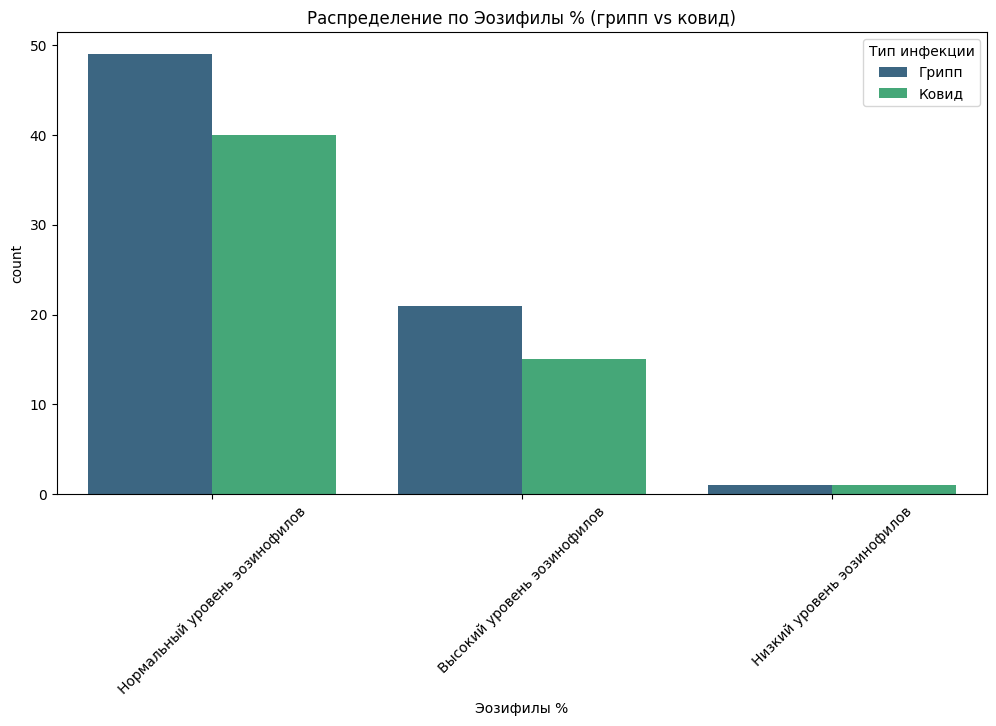

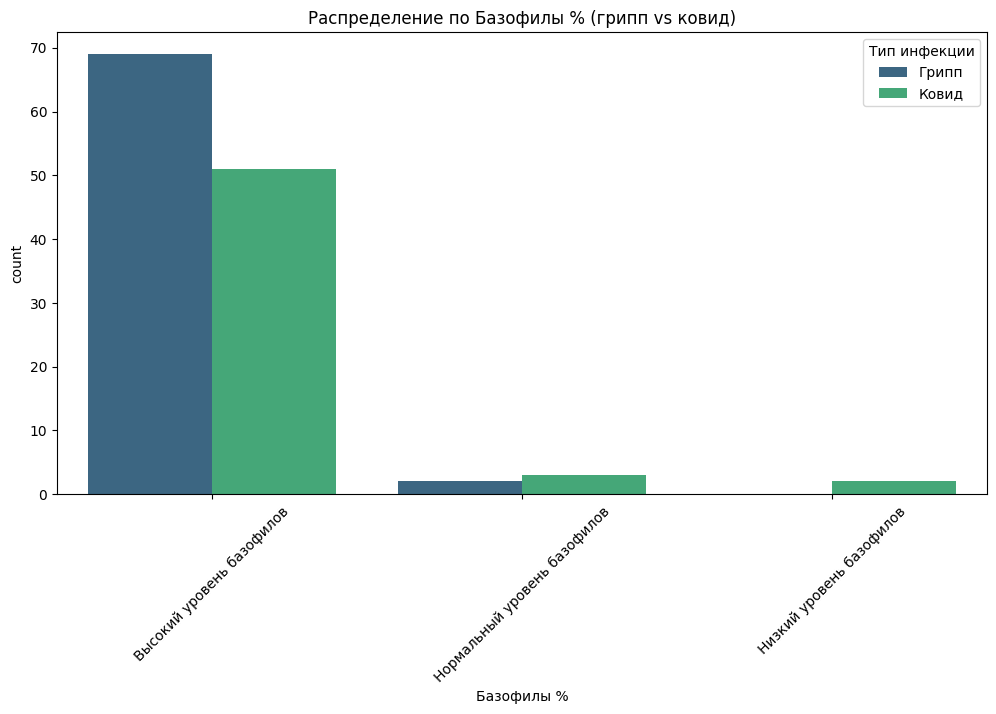

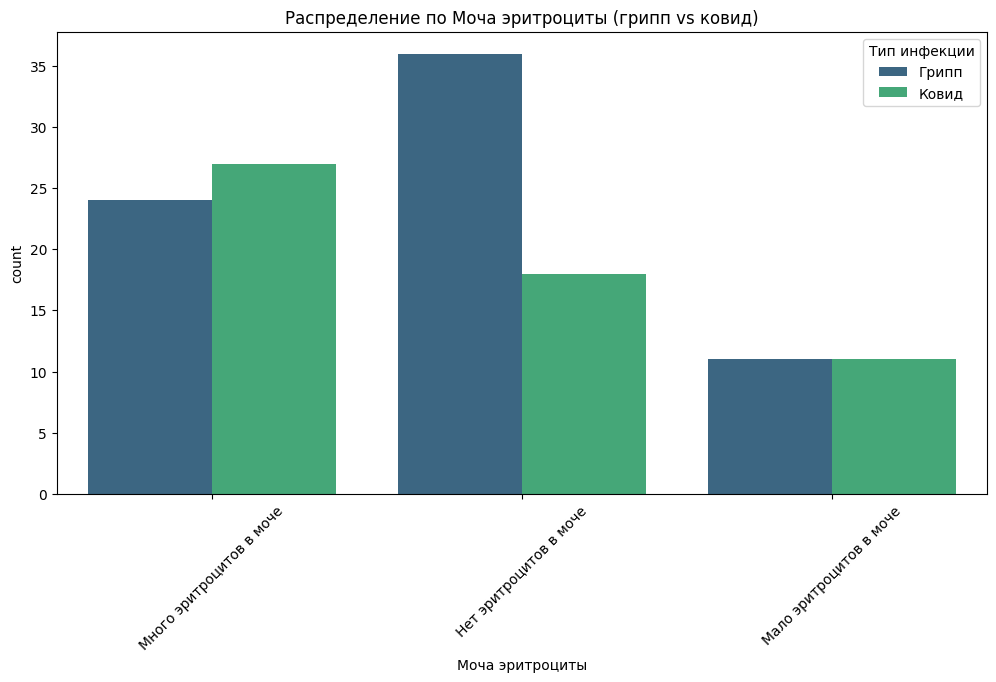

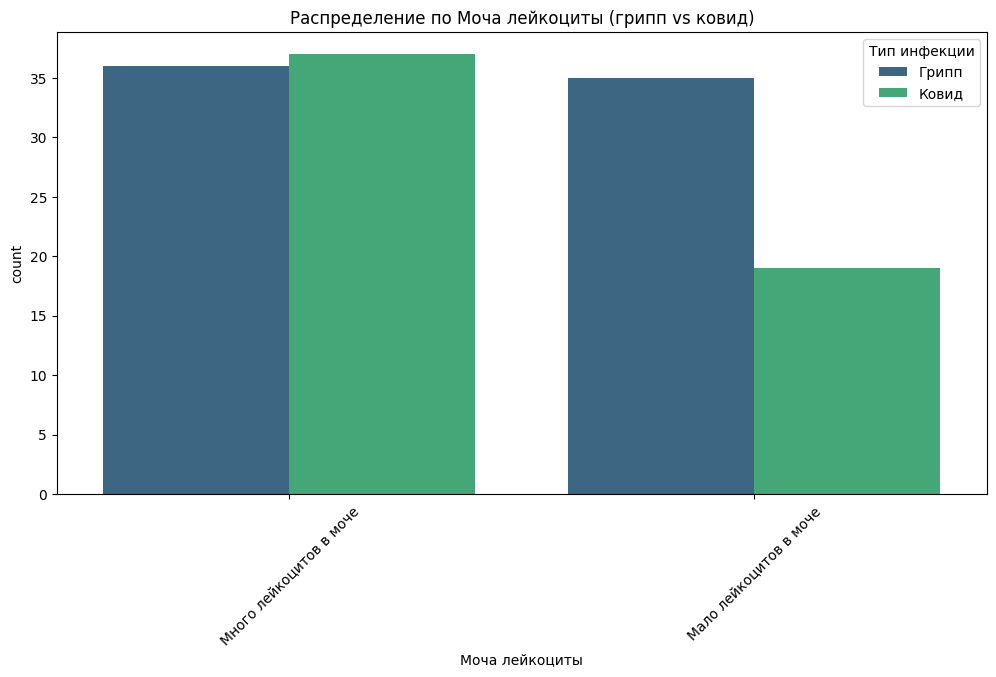

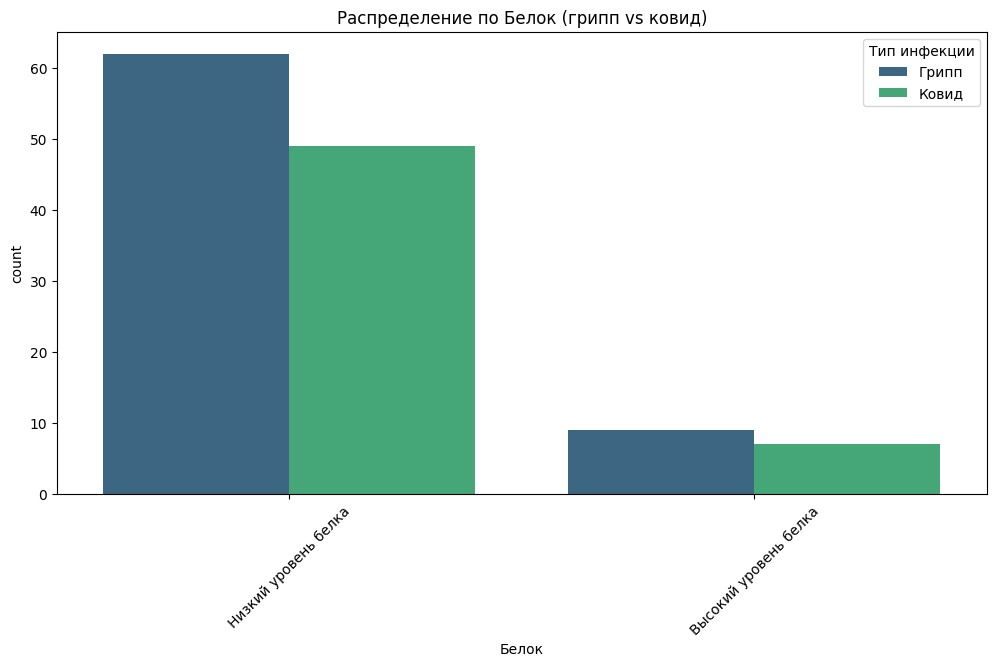

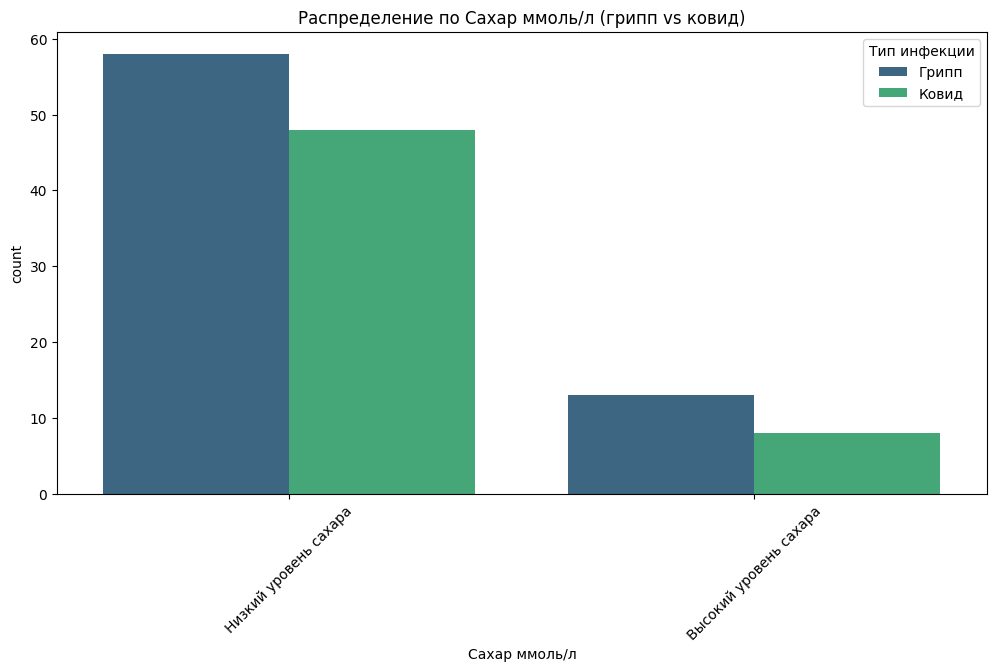

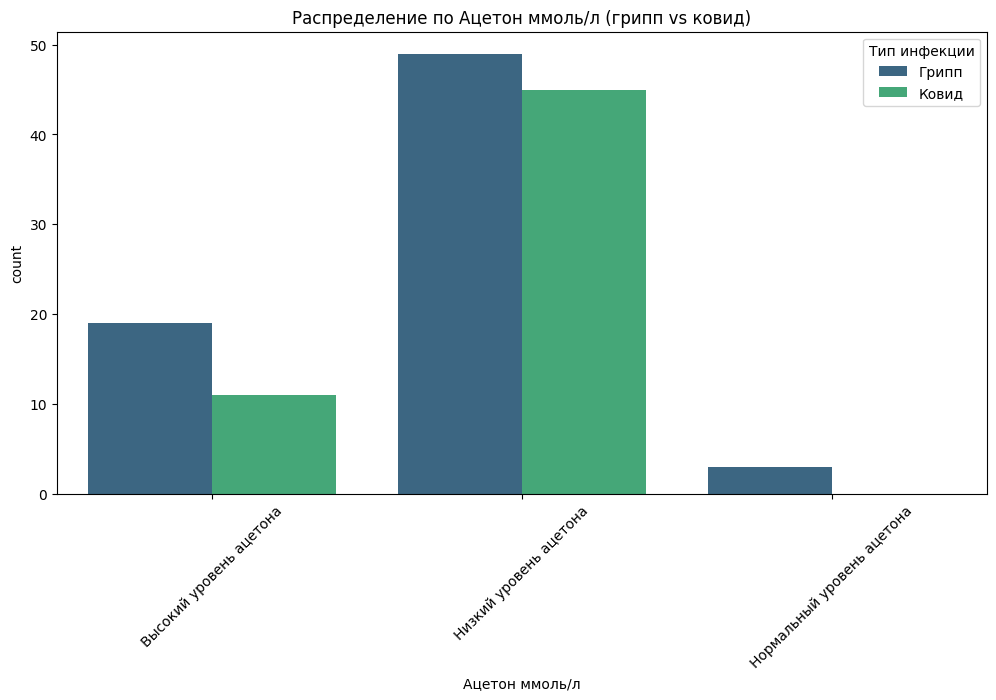

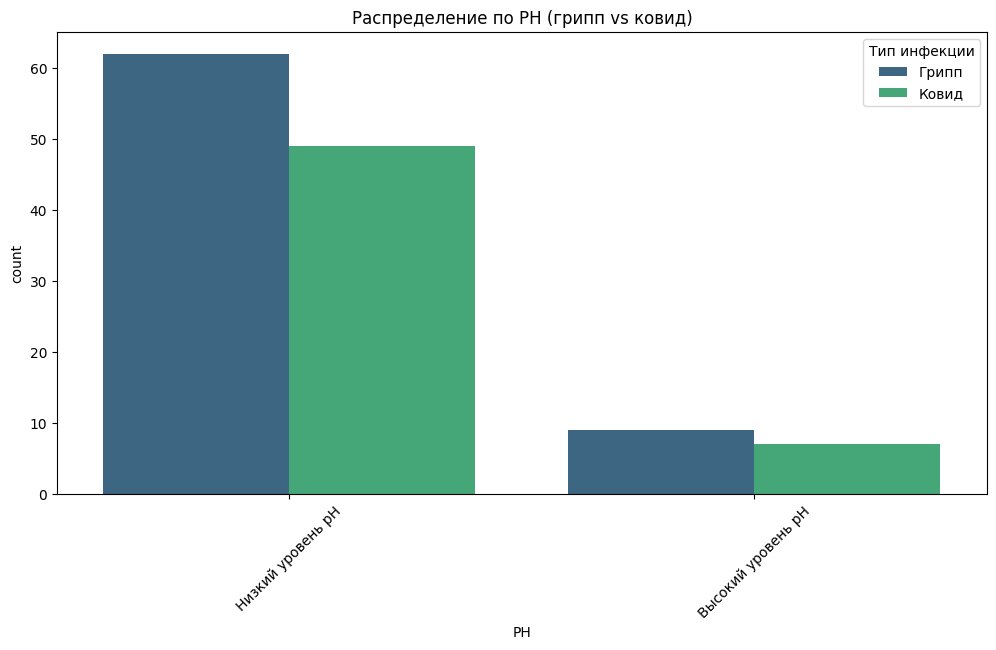

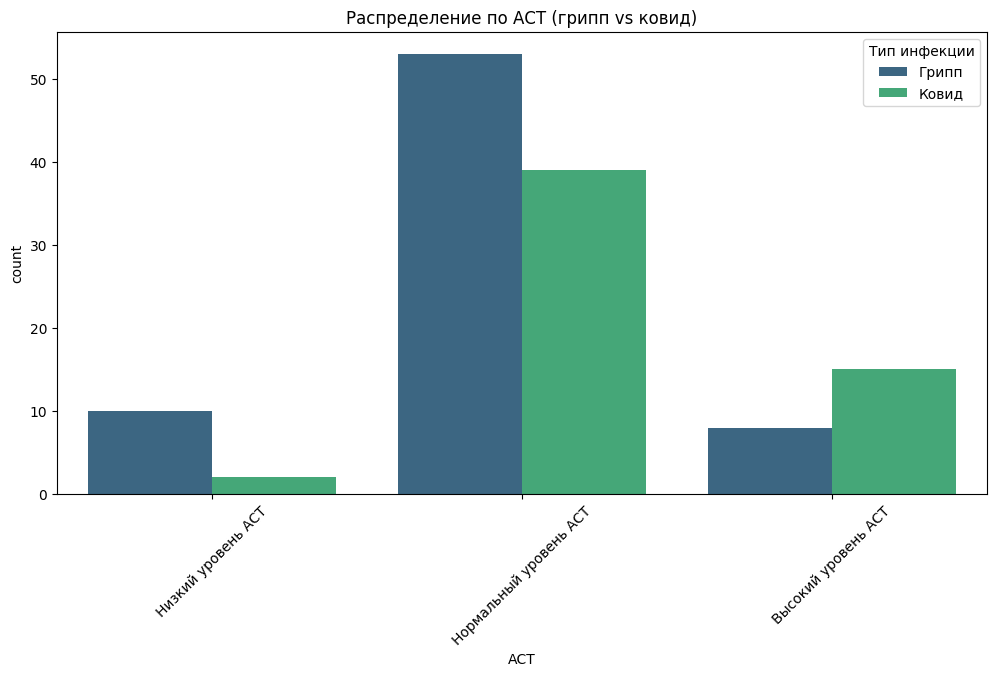

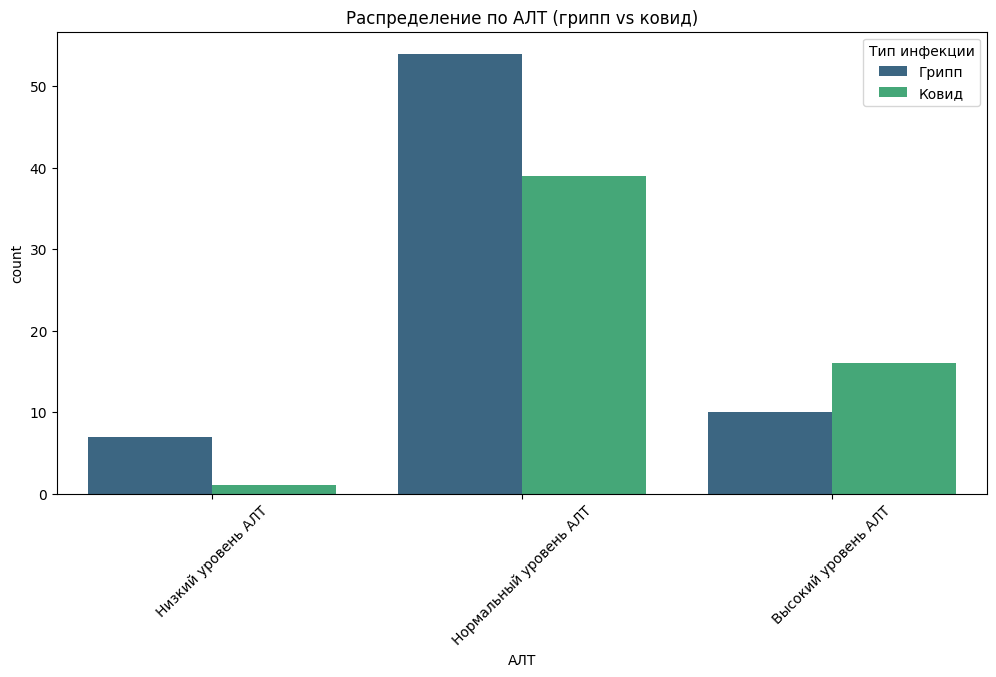

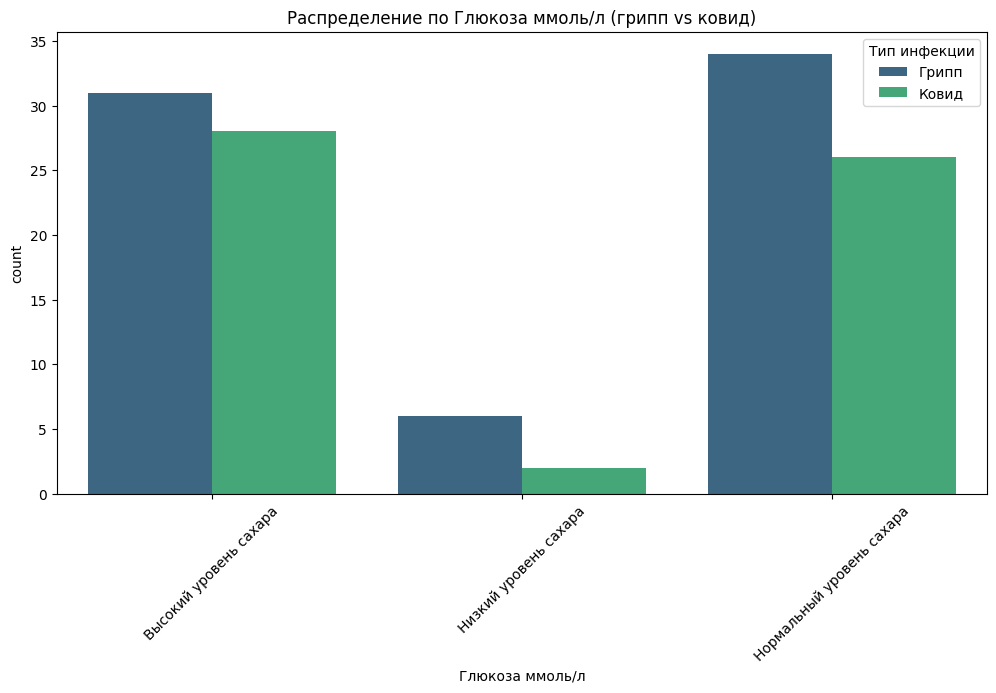

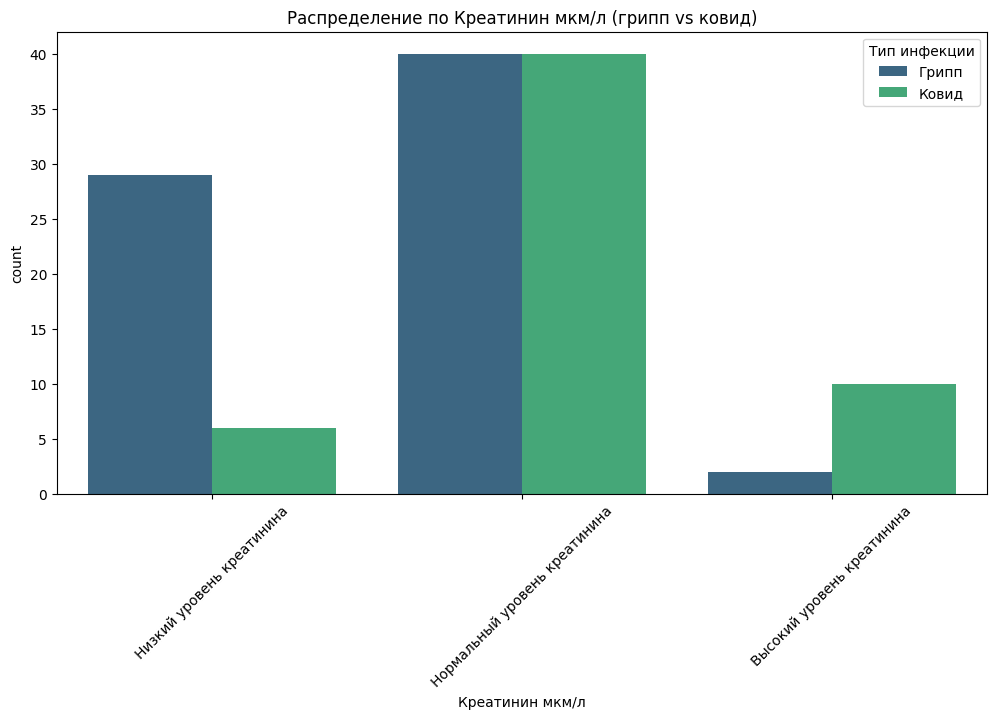

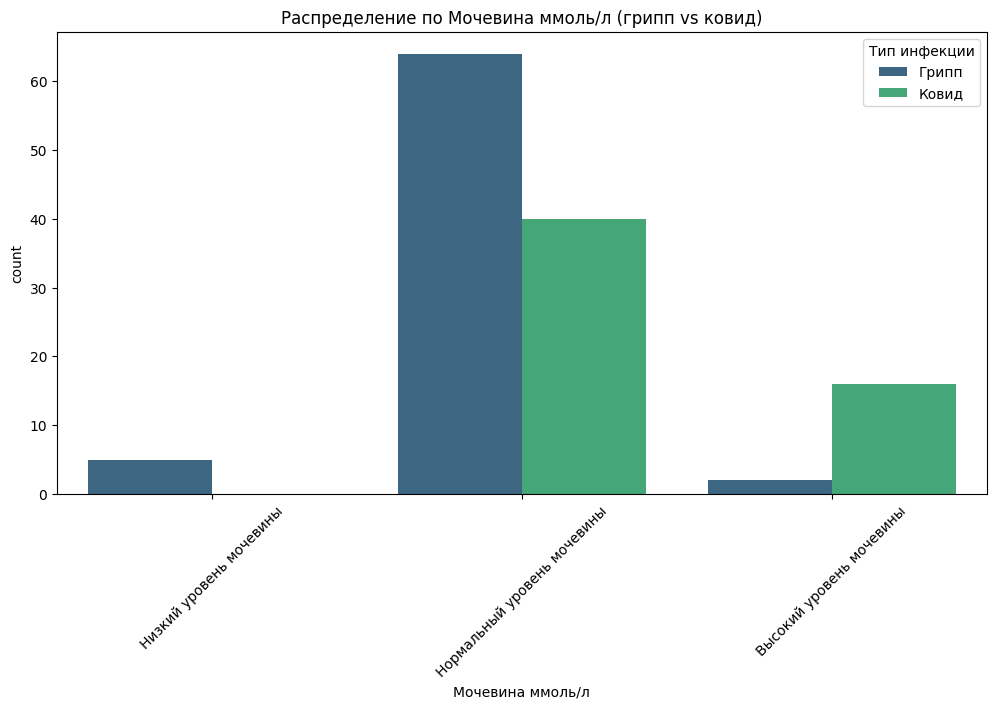

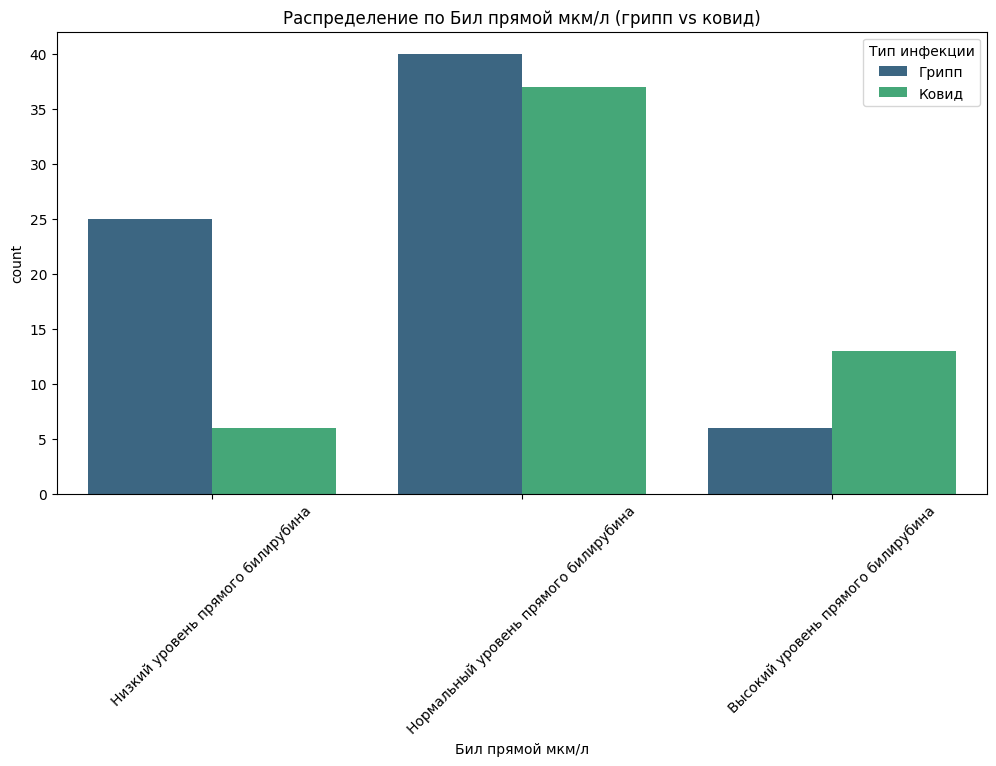

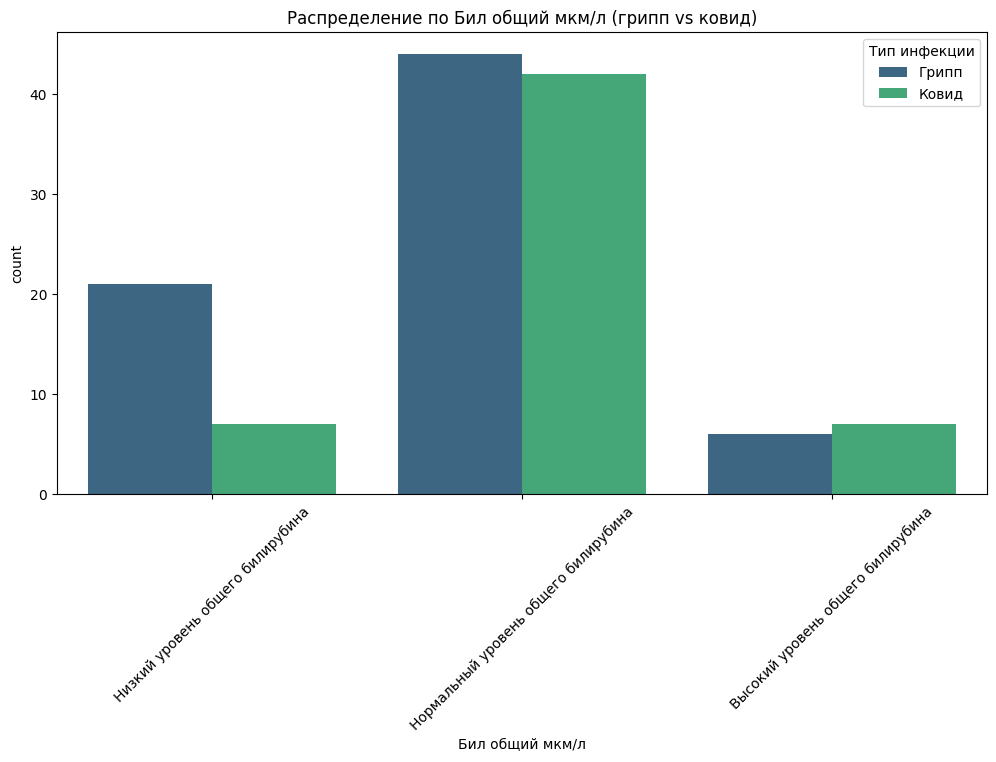

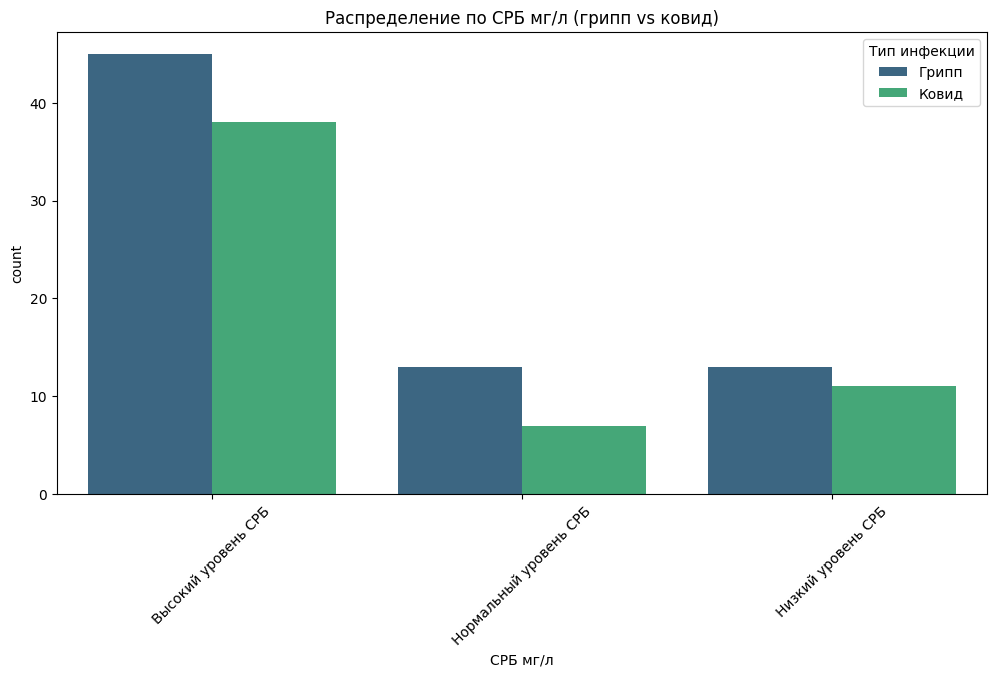

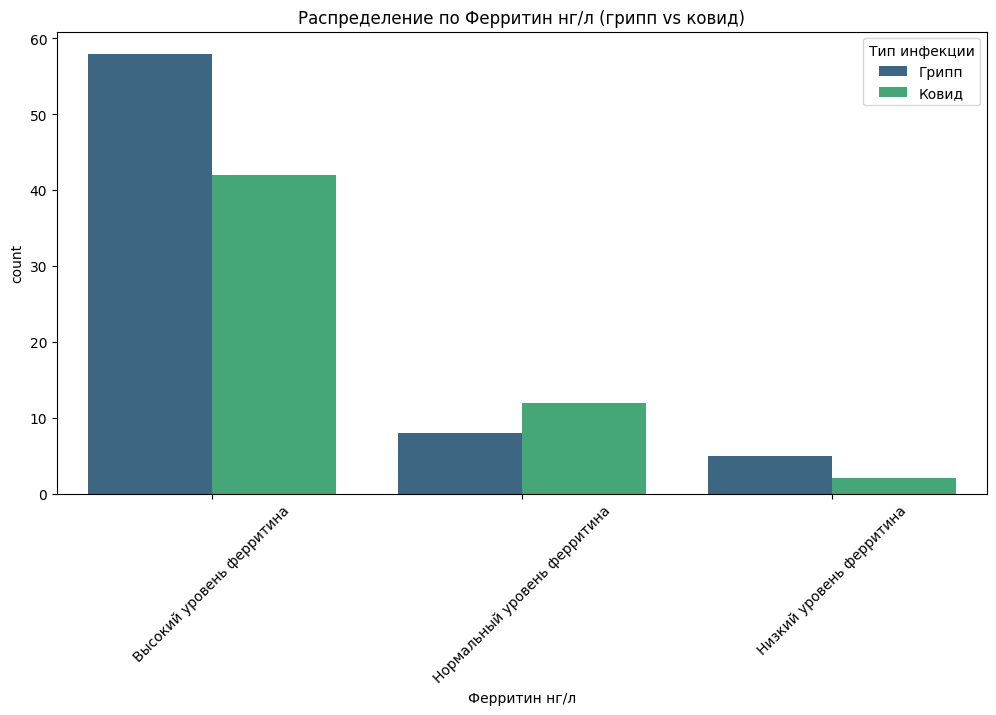

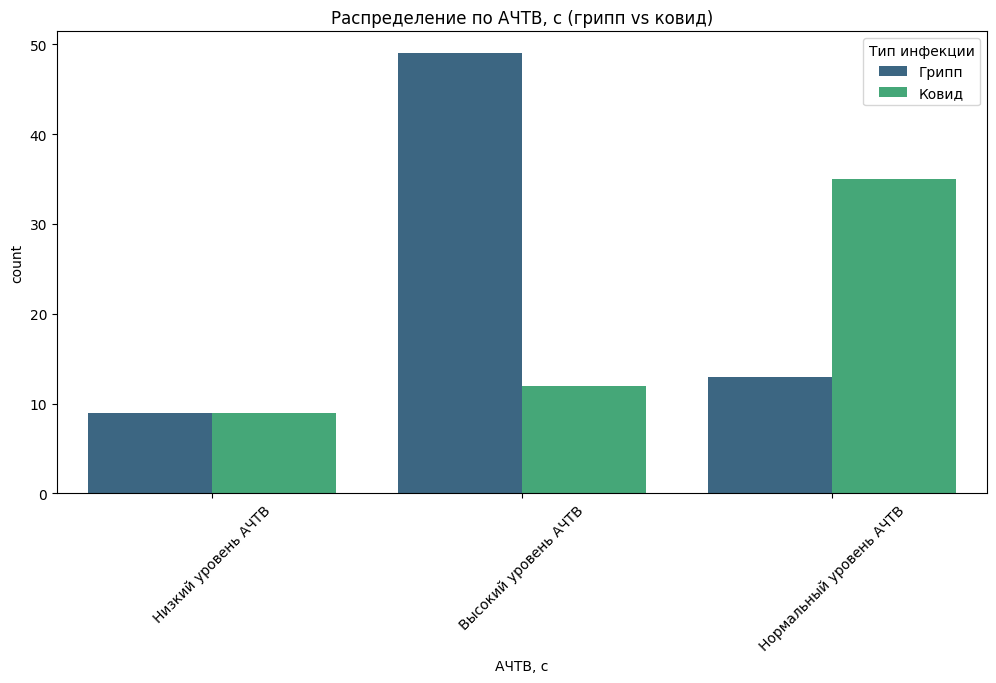

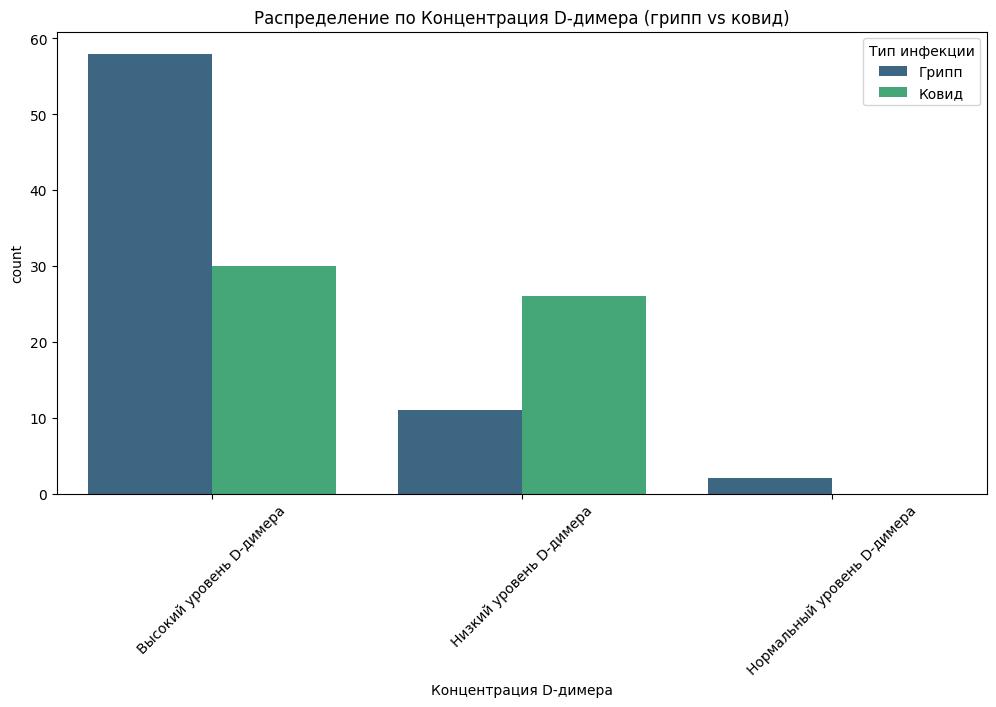

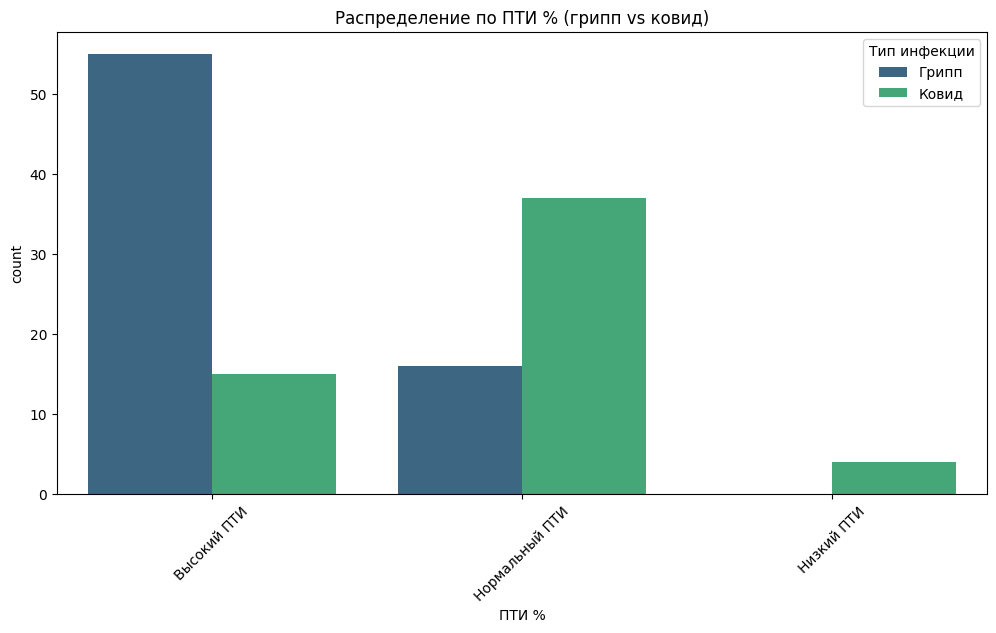

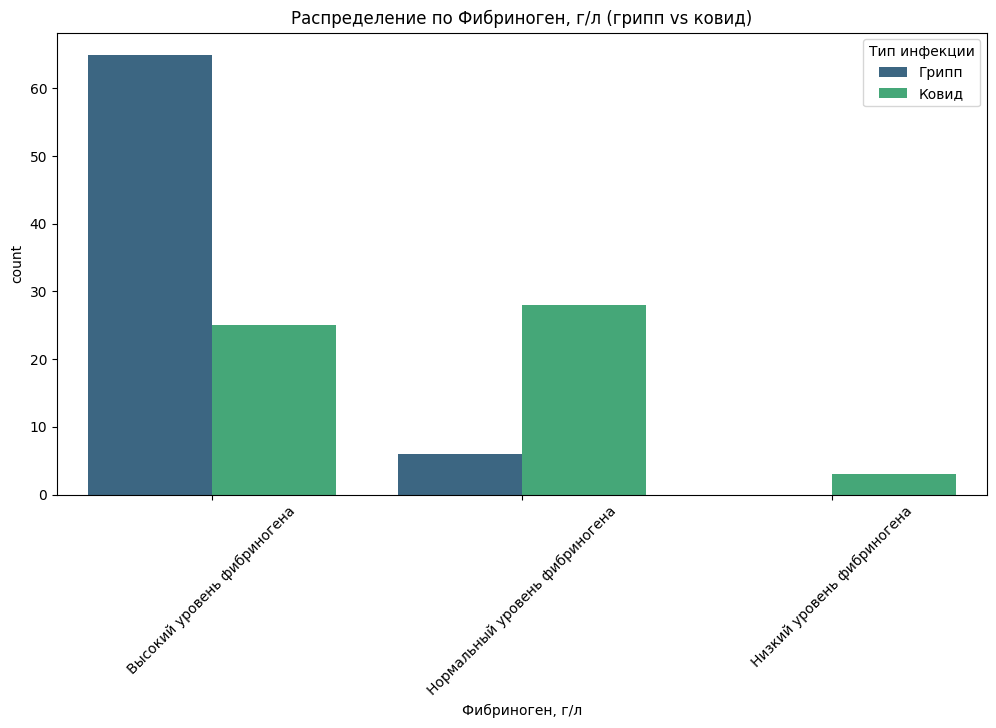

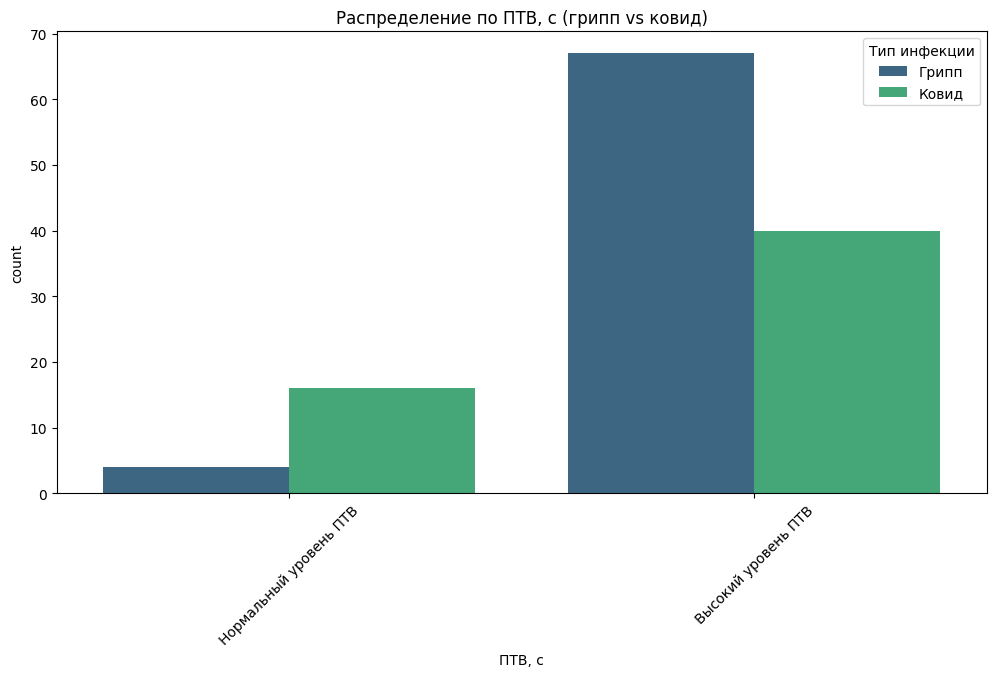

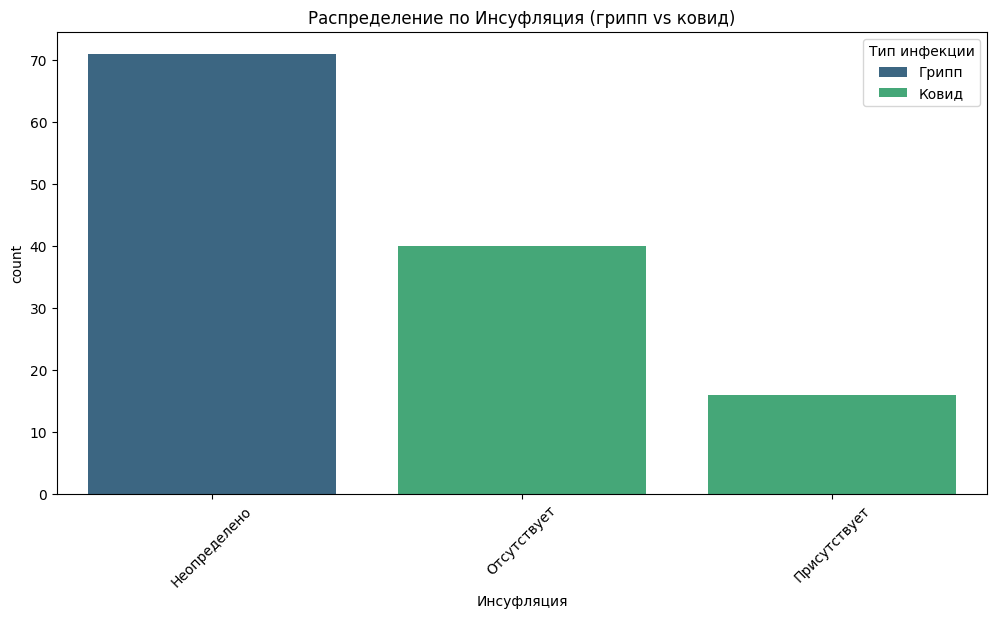

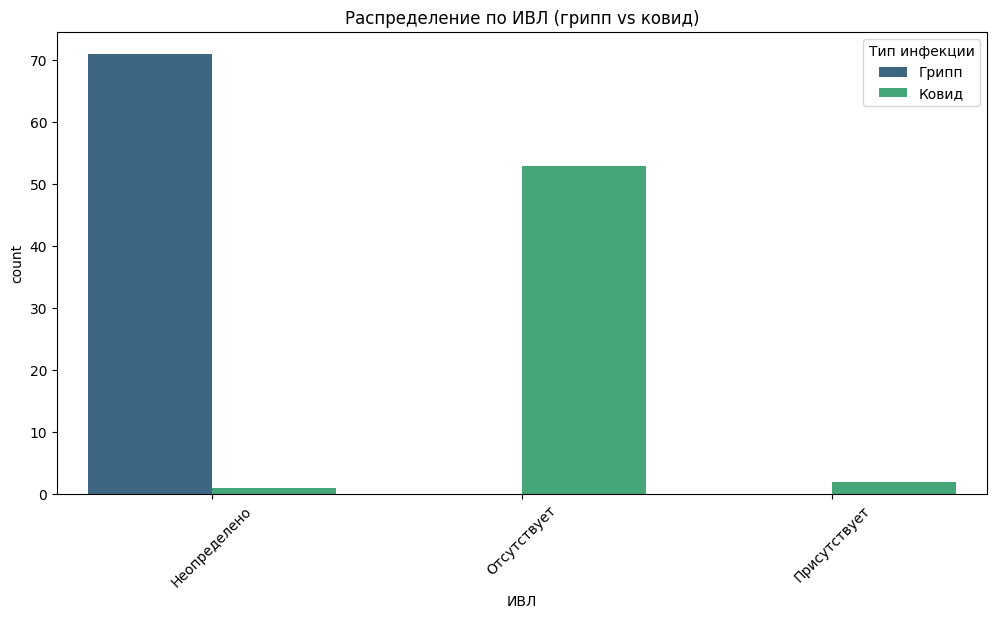

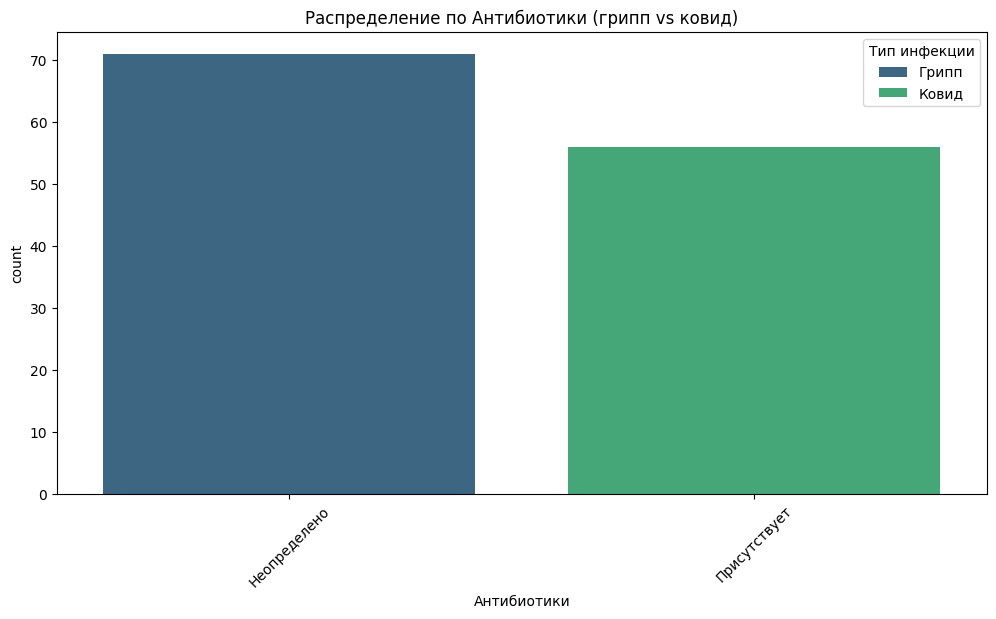

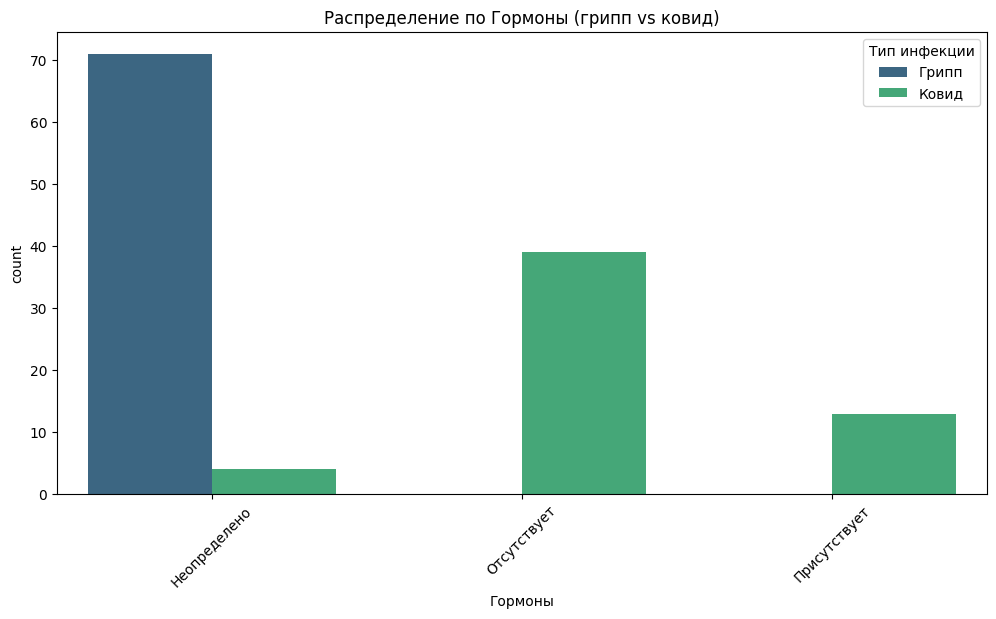

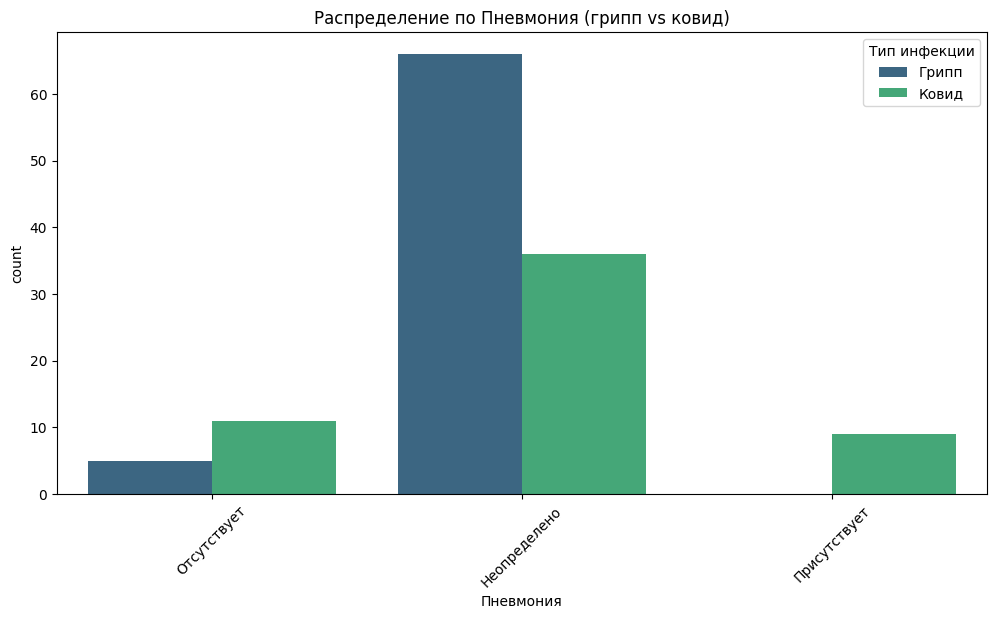

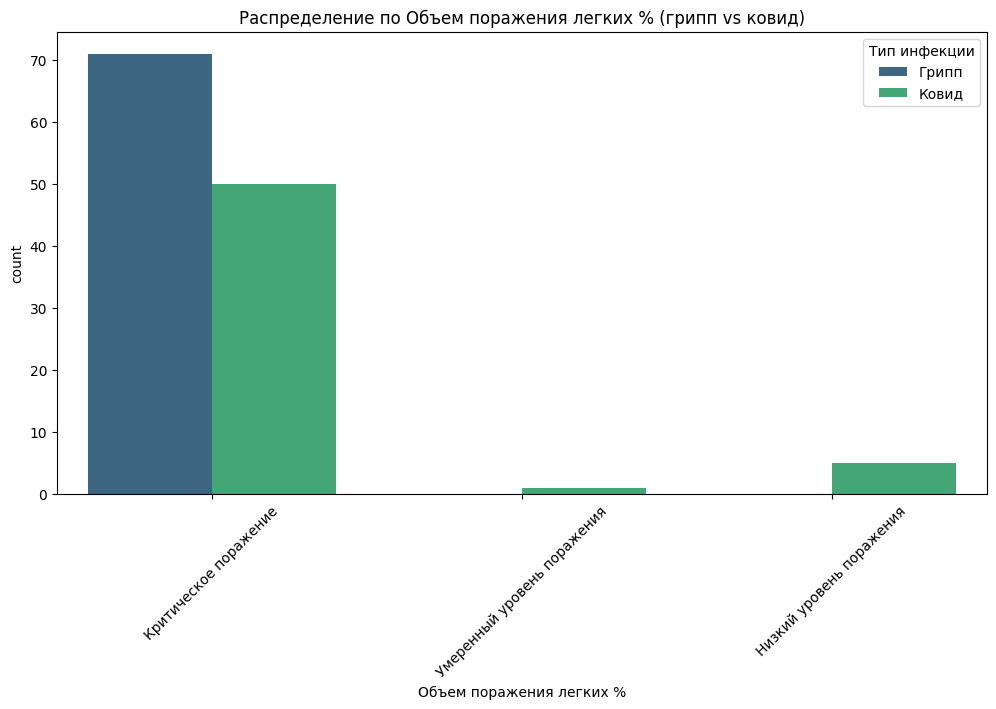

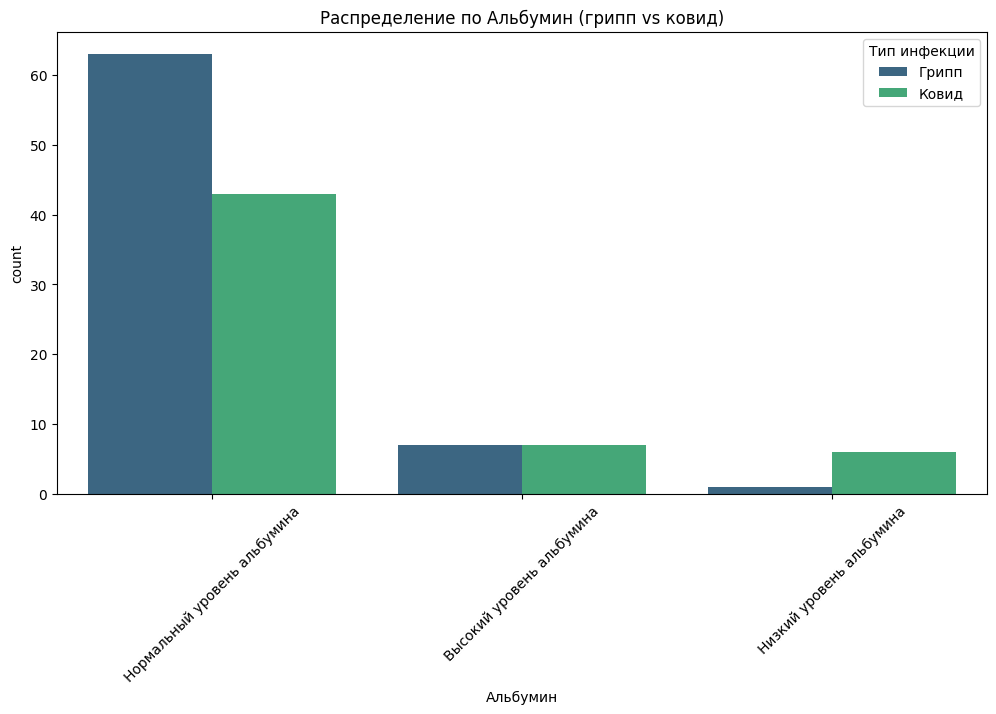

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Загрузка данных
data = pd.read_excel('Очищенные_данные_с_классификацией.xlsx',
                    )


# Функция для построения графиков
def plot_column_distribution(column_name):
    plt.figure(figsize=(12, 6))

    # Применяем условие на разделение по COVID-19 и гриппу
    sns.countplot(
        data=data,
        x=column_name,
        hue=data['Шифр'].apply(lambda x: 'Грипп' if 'Г' in str(x) else 'Ковид' if 'кф' in str(x) else ''),
        palette='viridis'
    )

    plt.title(f'Распределение по {column_name} (грипп vs ковид)')
    plt.xticks(rotation=45)
    plt.legend(title="Тип инфекции")
    plt.show()


# Построение графиков для всех столбцов данных
for column in data.columns:
    if column not in ['Шифр', '№', 'Возраст', '']:  # Исключаем ненужные столбцы
        plot_column_distribution(column)




Выводы:
1. Возрастная группа:
Если сравнить средний возраст пациентов с гриппом и COVID-19, то мы можем выделить важное наблюдение. Например:
Грипп чаще встречается у более молодых пациентов (если средний возраст для гриппа меньше, чем для COVID-19), что может указывать на то, что грипп более характерен для людей в возрасте 18-34 лет.
COVID-19, наоборот, может чаще встречаться среди более старшей возрастной группы, что указывает на особую уязвимость этой болезни среди пожилых людей.
2. Продолжительность госпитализации:
COVID-19 может требовать более длительного пребывания в больнице, чем грипп. Это связано с тем, что COVID-19 имеет более серьезные осложнения, такие как пневмония и нарушение дыхательной функции, что увеличивает потребность в медицинском наблюдении и терапии.
Грипп, в свою очередь, обычно вызывает более легкие формы заболевания, что может привести к более короткому сроку госпитализации.
3. Сатурация (уровень кислорода в крови):
У пациентов с COVID-19 обычно наблюдается более низкий уровень сатурации кислорода, чем у пациентов с гриппом. Это может быть связано с более выраженными проблемами с дыхательной системой у больных COVID-19, включая пневмонию или синдром острого респираторного дистресса.
4. Уровень С-реактивного белка (СРБ):
Уровень С-реактивного белка (СРБ) может быть выше у пациентов с COVID-19, что указывает на более выраженную воспалительную реакцию в организме. СРБ является маркером воспаления, и его повышение может свидетельствовать о более серьезных воспалительных процессах, характерных для COVID-19.
В случае с гриппом уровень СРБ может быть ниже, что указывает на менее выраженную воспалительную реакцию.
5. Эритроциты, лейкоциты и тромбоциты:
У пациентов с COVID-19 могут быть повышенные уровни эритроцитов и лейкоцитов, что может указывать на увеличение количества клеток, пытающихся бороться с инфекцией.
Тромбоциты у пациентов с COVID-19 также могут показывать отклонения, так как вирус может повлиять на систему свёртывания крови, увеличивая риск тромбообразования.
6. Лейкоциты и СОЭ:
Повышенные уровни лейкоцитов у пациентов с COVID-19 могут указывать на сильную иммунную реакцию, направленную на борьбу с вирусом.
Уровень СОЭ (скорости оседания эритроцитов) также может быть выше у пациентов с COVID-19, что является показателем воспалительного процесса.
Сравнительный анализ:
Грипп чаще встречается у молодых пациентов, а COVID-19 — у более пожилых, что может быть связано с различиями в уязвимости этих заболеваний в зависимости от возраста.
Пациенты с COVID-19 проводят в больнице больше времени, что может быть связано с более тяжелым течением болезни и большими рисками для здоровья.
У пациентов с COVID-19 наблюдается более низкий уровень сатурации, более высокий уровень СРБ и, вероятно, более выраженные изменения в уровне клеток крови, таких как лейкоциты и эритроциты.
Грипп, как правило, вызывает менее тяжелые симптомы и требует более короткого времени госпитализации, но все равно может сопровождаться некоторыми воспалительными процессами.
Итог:
В заключение можно сказать, что несмотря на общую схожесть симптомов у пациентов с гриппом и COVID-19 (например, повышение температуры, кашель, слабость), эти заболевания имеют ряд ключевых различий в их клинических проявлениях. Пациенты с COVID-19, как правило, требуют более длительного госпитализации и имеют более серьезные изменения в лабораторных показателях, таких как сатурация кислорода, С-реактивный белок и лейкоциты.

Этот вывод может служить основой для дальнейшего изучения различий между этими двумя заболеваниями и выработки более эффективных методов лечения и профилактики.








Предсказание методами машинного обучения

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Загрузка данных
data = pd.read_excel('Очищенные_данные.xlsx')

# Убираем строки с NaN в целевой переменной 'Шифр'
data = data.dropna(subset=['Шифр'])

# Преобразуем 'Шифр' в бинарную переменную: если 'Г' - грипп, если 'кф' - ковид
data['Целевая_переменная'] = data['Шифр'].apply(lambda x: 1 if 'кф' in str(x).lower() else 0)

# Выбираем только нужные столбцы для признаков (X) и целевой переменной (y)
X = data[['Пол', 'Возраст', 'Продолжительность госпитализации', 'Категория сопутствующей патологии']]
y = data['Целевая_переменная']  # Теперь целевая переменная - бинарная

# Обработка категориальных признаков
label_encoder = LabelEncoder()
X.loc[:, 'Пол'] = label_encoder.fit_transform(X['Пол'])

# Применяем One Hot Encoding для 'Категория сопутствующей патологии'
X = pd.get_dummies(X, columns=['Категория сопутствующей патологии'], drop_first=True)

# Преобразуем числовые столбцы в формат float (если они еще не в числовом формате)
X['Возраст'] = pd.to_numeric(X['Возраст'], errors='coerce')
X['Продолжительность госпитализации'] = pd.to_numeric(X['Продолжительность госпитализации'], errors='coerce')

# Убираем строки с NaN после преобразования
X = X.dropna()
y = y[X.index]  # Убираем соответствующие значения y, если есть строки с NaN в X

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель случайного леса
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели (точность)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 88.46%



Матрица ошибок

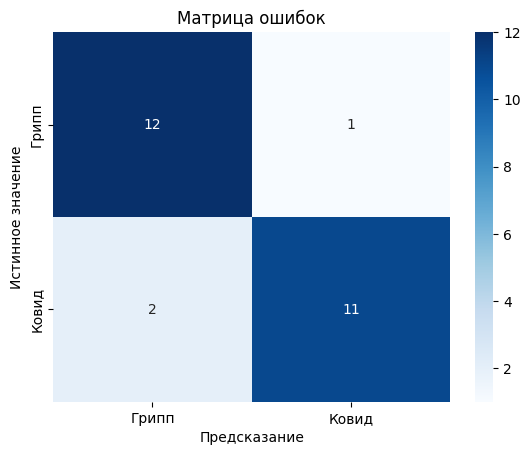

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Грипп', 'Ковид'], yticklabels=['Грипп', 'Ковид'])
plt.xlabel('Предсказание')
plt.ylabel('Истинное значение')
plt.title('Матрица ошибок')
plt.show()

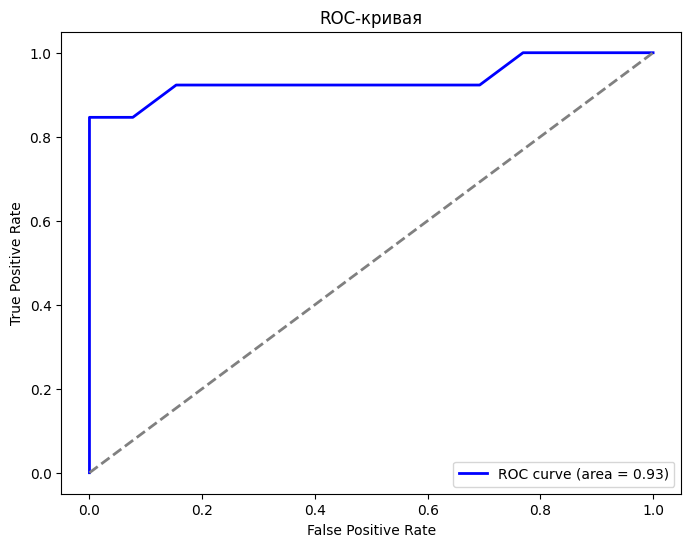

In [22]:
from sklearn.metrics import roc_curve, auc

# Получаем вероятности для каждой из классов
y_prob = model.predict_proba(X_test)[:, 1]

# Строим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()


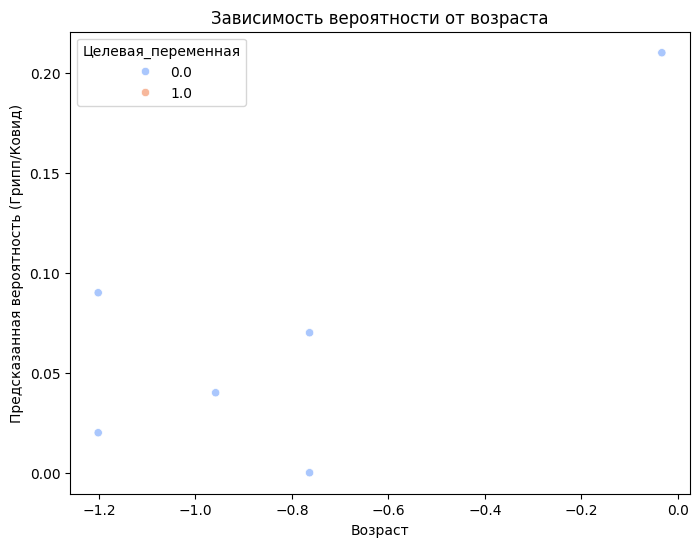

In [19]:
# Добавим столбец с предсказанными вероятностями для анализа
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df['Predicted Probability'] = y_prob

# Построим зависимость вероятности от возраста (например)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_df['Возраст'], y=X_test_df['Predicted Probability'], hue=y_test, palette='coolwarm')
plt.xlabel('Возраст')
plt.ylabel('Предсказанная вероятность (Грипп/Ковид)')
plt.title('Зависимость вероятности от возраста')
plt.show()


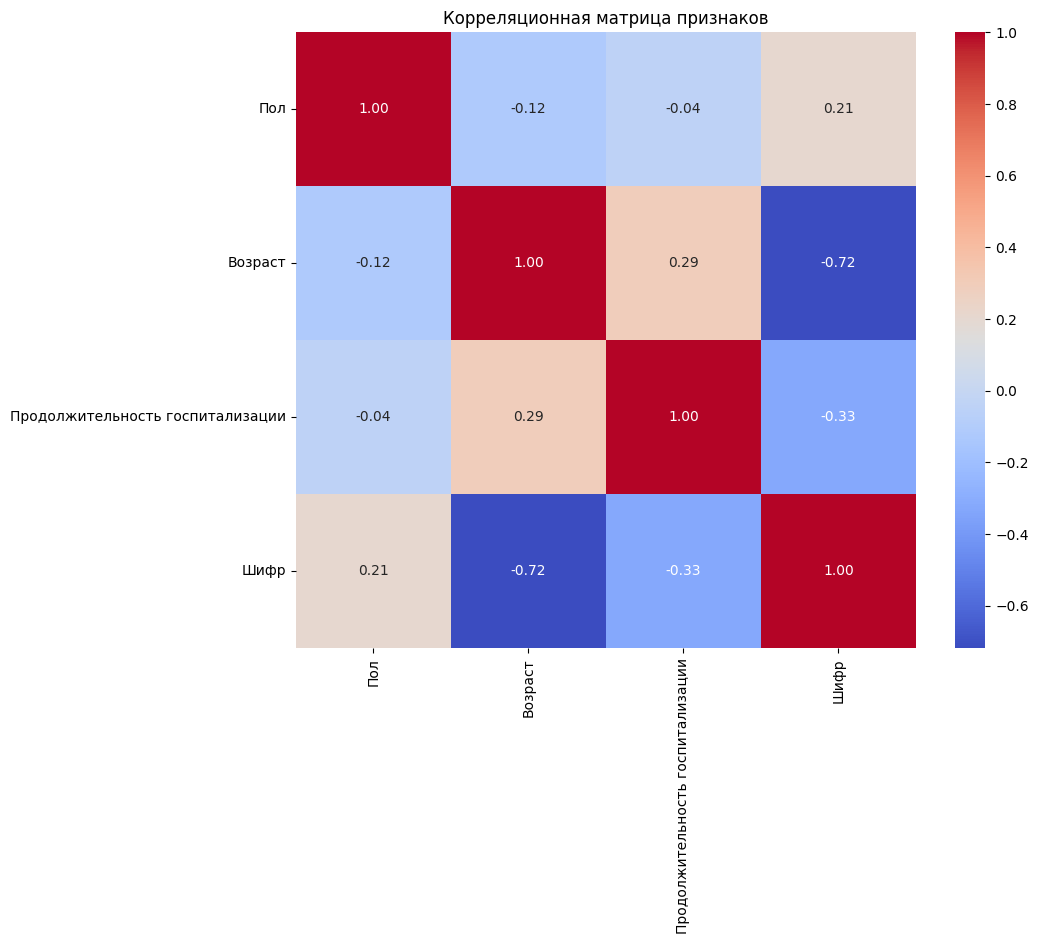

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
data = pd.read_excel('Очищенные_данные.xlsx')

# Убираем строки с NaN в целевой переменной 'Шифр'
data = data.dropna(subset=['Шифр'])

# Выбираем только нужные столбцы
data_selected = data[['Пол', 'Возраст', 'Продолжительность госпитализации', 'Шифр']].copy()

# Обработка категориальных признаков
data_selected.loc[:, 'Пол'] = LabelEncoder().fit_transform(data_selected['Пол'])

# Преобразуем целевую переменную 'Шифр' в числовой тип (например, 1 для гриппа и 0 для ковида)
data_selected.loc[:, 'Шифр'] = data_selected['Шифр'].apply(lambda x: 1 if 'Г' in x else 0)

# Расчет корреляции
correlation_matrix = data_selected.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица признаков')
plt.show()
